# Table of Contents
<br>
<ol>
    <ol>
        <h2>1. <a href='#1' style="text-decoration : none; color : #000000;"> 50:50 Infected/Uninfected Users</a></h2>
     </ol>
    <br>
    <ol>
        <h2>2. <a href='#2' style="text-decoration : none; color : #000000;"> 70:30 Uninfected/Infected Users</a></h2>
     </ol>
</ol>

In [4]:
import os
import progressbar as pb
from progressbar import ProgressBar, Percentage, Bar, ETA, FileTransferSpeed
import time
import multiprocessing

import pandas as pd
import numpy as np
import warnings

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import missingno as msno
import pprint
from tabulate import tabulate
from mpl_toolkits.mplot3d import Axes3D


import scipy as sp
from scipy import stats
from mca import *
from scipy.stats import boxcox
import hdbscan


%matplotlib inline
pd.set_option("display.max_columns",80)
pd.set_option('display.max_rows', 1200)
warnings.filterwarnings("ignore")

from IPython.display import HTML

import plotly
import cufflinks as cf
import plotly.plotly as py
import plotly.graph_objs as go
cf.go_offline()
import plotly.tools as tls
import plotly.figure_factory as ff
from plotly.graph_objs import *
# tls.set_credentials_file(username='darshan.bhansali', api_key='38zZ2TS4ob4feqV0bvR0')
# tls.set_credentials_file(username='darshan-b', api_key='KuC894mmVN7kBiZZyffO')
# tls.set_credentials_file(username='darshan18', api_key='dhwPNrhtYUy2iMbQqALn')

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,accuracy_score,log_loss,classification_report
from sklearn.model_selection import GridSearchCV,StratifiedKFold,train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering,FeatureAgglomeration,KMeans,FeatureAgglomeration, DBSCAN,SpectralClustering,Birch,MeanShift

In [36]:
z=pd.read_csv('Feature_with_Hour_Class_Dest.csv')
z.set_index(['Source_User'],drop=True,inplace=True)

In [37]:
no_med_user=pd.read_csv('Source_User_No_Medium_Severity.csv')
no_med_user.drop(['Unnamed: 0'],axis=1,inplace=True)
no_med=no_med_user.Source_User

In [38]:
z.reset_index(inplace=True)
x=z[(z.Target=='infected')&(z.Source_User.isin(no_med))]
y=z[(z.Target=='uninfected')]
y=y.sample(n=28)
z=(x.append(y))
z.set_index(['Source_User'],drop=True,inplace=True)

<h2>1. <a id='1' style="text-decoration : none; color : #000000;"> 50:50 Infected/Uninfected Users</a></h2>

In [46]:
print("Infected/Uninfected Users")
z.Target.value_counts()

Infected/Uninfected Users


infected      28
uninfected    28
Name: Target, dtype: int64

### Feature Set

In [47]:
X=z.iloc[:,z.columns!='Target']

In [48]:
target=z.Target.reset_index(drop=True)

In [49]:
X.columns=['Number of Records','Average Size of Packets Received','Average Size of Packets Sent','Average Elapsed Time',
           'Average number of Bytes sent', 'Average number of Bytes received','Number of different Source Ports',
           'Number of different Destination Ports', 'Number of different Applications','Number of different Source IP',
           'Number of different Destination IP','Average differnce in Received Time',
          'Number of Sessions at 00:00','Number of Sessions at 01:00','Number of Sessions at 02:00','Number of Sessions at 03:00',
          'Number of Sessions at 04:00','Number of Sessions at 05:00','Number of Sessions at 06:00',
          'Number of Sessions at 07:00','Number of Sessions at 08:00','Number of Sessions at 09:00',
          'Number of Sessions at 10:00','Number of Sessions at 11:00','Number of Sessions at 12:00',
          'Number of Sessions at 13:00','Number of Sessions at 14:00','Number of Sessions at 15:00',
          'Number of Sessions at 16:00','Number of Sessions at 17:00','Number of Sessions at 18:00',
          'Number of Sessions at 19:00','Number of Sessions at 20:00','Number of Sessions at 21:00',
          'Number of Sessions at 22:00','Number of Sessions at 23:00']

In [50]:
X.head(2)

Number of Records  \
Source_User                                                             
802f787a8d4ebe3d4830943c5f4d50572512c76002ffdc4...               2766   
db663ee7c30f6e366215d111f745205c73789819f578102...                574   

                                                    Average Size of Packets Received  \
Source_User                                                                            
802f787a8d4ebe3d4830943c5f4d50572512c76002ffdc4...                         46.136659   
db663ee7c30f6e366215d111f745205c73789819f578102...                         80.881533   

                                                    Average Size of Packets Sent  \
Source_User                                                                        
802f787a8d4ebe3d4830943c5f4d50572512c76002ffdc4...                     34.780550   
db663ee7c30f6e366215d111f745205c73789819f578102...                     62.236934   

                                                    Average Elapsed Time  \
Source_User                                                                
802f787a8d4ebe3d4830943c5f4d50572512c76002ffdc4...             83.966739   
db663ee7c30f6e366215d111f745205c73789819f578102...            108.470383   

                                                    Average number of Bytes sent  \
Source_User                                                                        
802f787a8d4ebe3d4830943c5f4d50572512c76002ffdc4...                   5116.734635   
db663ee7c30f6e366215d111f745205c73789819f578102...                   6568.702091   

                                                    Average number of Bytes received  \
Source_User                                                                            
802f787a8d4ebe3d4830943c5f4d50572512c76002ffdc4...                      52664.422270   
db663ee7c30f6e366215d111f745205c73789819f578102...                      97010.381533   

                                                    Number of different Source Ports  \
Source_User                                                                            
802f787a8d4ebe3d4830943c5f4d50572512c76002ffdc4...                            2577.0   
db663ee7c30f6e366215d111f745205c73789819f578102...                             561.0   

                                                    Number of different Destination Ports  \
Source_User                                                                                 
802f787a8d4ebe3d4830943c5f4d50572512c76002ffdc4...                                   13.0   
db663ee7c30f6e366215d111f745205c73789819f578102...                                   10.0   

                                                    Number of different Applications  \
Source_User                                                                            
802f787a8d4ebe3d4830943c5f4d50572512c76002ffdc4...                                33   
db663ee7c30f6e366215d111f745205c73789819f578102...                                22   

                                                    Number of different Source IP  \
Source_User                                                                         
802f787a8d4ebe3d4830943c5f4d50572512c76002ffdc4...                             37   
db663ee7c30f6e366215d111f745205c73789819f578102...                             45   

                                                    Number of different Destination IP  \
Source_User                                                                              
802f787a8d4ebe3d4830943c5f4d50572512c76002ffdc4...                                 669   
db663ee7c30f6e366215d111f745205c73789819f578102...                                 221   

                                                    Average differnce in Received Time  \
Source_User                                                                              
802f787a8d4ebe3d4830943c5f4d50572512c76002ffdc4...                          967.258496   
db663ee7c30f6e366215d11

### Scaled X

In [51]:
orig_X=X.copy()
X=X.values
scaler_X=StandardScaler()
scaler_X.fit(X)
scaled_X=scaler_X.transform(X)

In [52]:
scaled_X[0:2]

array([[ 1.75106169, -0.45727409, -0.30580676, -0.17344935, -0.34391488,
        -0.42683404,  1.77948475,  0.23142024,  0.72561541,  0.96454925,
         1.68072158, -0.39879295,  0.77055656,  0.79533951,  0.25469992,
        -0.11427381,  0.54662181,  0.01133013, -0.15353705,  3.0962334 ,
         2.20052378,  1.66514931,  0.63767392,  1.06964271,  1.24418201,
         3.17383554,  3.2334859 ,  2.22610796,  2.45151148,  2.30586806,
         1.49042861,  0.7083004 ,  1.56059325,  1.78974876,  1.237137  ,
         0.54537898],
       [-0.36353191, -0.19308673,  0.06432015,  0.47407721, -0.19107733,
        -0.17191513, -0.3493349 , -0.1612929 , -0.16655843,  1.59080732,
        -0.16421139, -0.26239507, -0.54010974, -0.56117864, -0.59922384,
        -0.50318358, -0.60403371, -0.50035296, -0.312916  , -0.50297125,
        -0.5350225 , -0.78570444, -0.14332085, -0.56832868,  0.05097052,
        -0.27753101, -0.11975874,  0.65374665, -0.34654501,  0.70803465,
         0.76289736, -0.08887

In [53]:
def get_purity(labels):
    d=pd.DataFrame(labels).join(target)
    d.columns=['Cluster_Labels','Target']
    d=d.groupby(['Cluster_Labels','Target']).agg({'Target':len}).unstack().fillna(0).transpose()
    q=d.apply(lambda x: x/x.sum()*100,axis=0)
    mt=d.append(q)
    mt.index=['Infected #','Uninfected #','Infected %','Uninfected %']
    display(mt.round(2))
   
    
def get_kmeans(data):
    distortions=[]
    for i in range(1,5):
        kmeanModel=KMeans(n_clusters=i,random_state=0)
        kmeanModel.fit(data)
        distortions.append(kmeanModel.inertia_)
        get_purity(kmeanModel.labels_)
        print("Sum of square of distances is:",kmeanModel.inertia_)
        print("\n---------------------------------------------------------------------------------------------------------\n")
        print("---------------------------------------------------------------------------------------------------------\n")
    plt.plot(np.arange(1,5), distortions, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Sum of squared distances ')
    plt.title('The Elbow Method showing the optimal value of k')
    plt.show()
    print("The minimum sum of sqaures of distances is :",min(distortions)," for k",distortions.index(min(distortions))+1)
    return kmeanModel

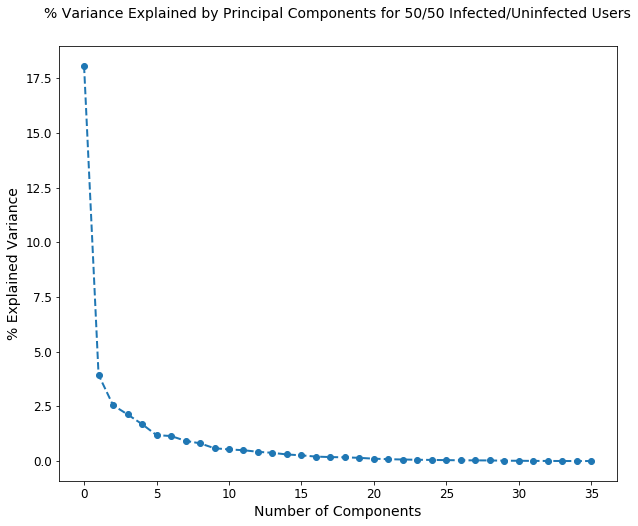

In [54]:
pca = PCA(random_state=0)
pca.fit(scaled_X)
plt.figure(1, figsize=(10, 8))
plt.clf()
plt.plot(pca.explained_variance_,'--o', linewidth=2)
plt.axis('tight')
plt.xlabel('Number of Components',size=14)
plt.xticks(size=12)
plt.ylabel('% Explained Variance',size=14)
plt.yticks(size=12)
plt.title('% Variance Explained by Principal Components for 50/50 Infected/Uninfected Users',size=14,y=1.05)
plt.show()


In [55]:
d=pca.explained_variance_
print("Component\t%Explained Variance\tDecrease in % Explained Variance")
for x in range(0, len(d)):
    if x==0:
        print(x+1,"\t\t",np.round(d[x],5),"\t\t",0)
    else:
        print(x+1,"\t\t",np.round(d[x],5),"\t\t",((d[x-1]-d[x])*100/d[x-1]))

Component	%Explained Variance	Decrease in % Explained Variance
1 		 18.07785 		 0
2 		 3.94038 		 78.2032846115
3 		 2.55214 		 35.231034374
4 		 2.1316 		 16.478035775
5 		 1.68751 		 20.8334212413
6 		 1.18417 		 29.827503424
7 		 1.14352 		 3.4331258764
8 		 0.92483 		 19.1242143874
9 		 0.80945 		 12.4759009639
10 		 0.58441 		 27.800994718
11 		 0.53079 		 9.17615139874
12 		 0.49421 		 6.89029672578
13 		 0.4217 		 14.6722249144
14 		 0.37449 		 11.1948162069
15 		 0.3002 		 19.8380795388
16 		 0.26016 		 13.337130381
17 		 0.20242 		 22.1942728093
18 		 0.18127 		 10.4494549639
19 		 0.16925 		 6.62851431063
20 		 0.14588 		 13.8115474316
21 		 0.10715 		 26.5493239348
22 		 0.08345 		 22.1155503796
23 		 0.06985 		 16.2953530858
24 		 0.0576 		 17.5477773069
25 		 0.05024 		 12.7711963888
26 		 0.04093 		 18.525793516
27 		 0.03416 		 16.5409637115
28 		 0.0303 		 11.3171079529
29 		 0.02673 		 11.7655480837
30 		 0.01539 		 42.4330419174
31 		 0.012 		 22.0297822034
32 		 0.00

#### I think that we should take 10 components because the variance explained with it is 90%. In addition ,we can see from the table above that after 10 components the addition in explained variance with each component is flattened out except few sudden increases. 

In [59]:
pca=PCA(n_components=10,random_state=0)
X_pca_10=pca.fit_transform(scaled_X)
print("Table for components of PCA when using 13 components with explained variance of",sum(pca.explained_variance_ratio_))
m=pd.DataFrame(pca.components_,columns=orig_X.columns,index = ['PC-1','PC-2','PC-3','PC-4','PC-5','PC-6','PC-7','PC-8','PC-9',
                                                              'PC-10'])
m

Table for components of PCA when using 13 components with explained variance of 0.901276011846


Number of Records  Average Size of Packets Received  \
PC-1            0.234096                          0.068972   
PC-2           -0.064635                          0.420278   
PC-3            0.019462                          0.127537   
PC-4            0.003254                         -0.195025   
PC-5            0.031345                          0.185882   
PC-6            0.037578                         -0.019176   
PC-7            0.058835                         -0.026508   
PC-8           -0.029885                         -0.130154   
PC-9           -0.014348                          0.019634   
PC-10          -0.007633                          0.007536   

       Average Size of Packets Sent  Average Elapsed Time  \
PC-1                       0.062829              0.003096   
PC-2                       0.423572              0.258903   
PC-3                       0.113951             -0.036813   
PC-4                      -0.222506              0.090755   
PC-5                       0.155040              0.055169   
PC-6                       0.034099             -0.346730   
PC-7                       0.045494              0.508775   
PC-8                      -0.048336              0.380412   
PC-9                       0.019964              0.064288   
PC-10                     -0.005298              0.061514   

       Average number of Bytes sent  Average number of Bytes received  \
PC-1                       0.075120                          0.065331   
PC-2                       0.347754                          0.420859   
PC-3                       0.076395                          0.129656   
PC-4                      -0.107258                         -0.192194   
PC-5                      -0.120426                          0.197239   
PC-6                       0.438177                         -0.018017   
PC-7                      -0.081277                         -0.022497   
PC-8                       0.173681                         -0.148334   
PC-9                       0.017594                          0.028414   
PC-10                     -0.016890                          0.001404   

       Number of different Source Ports  \
PC-1                           0.234587   
PC-2                          -0.056426   
PC-3                           0.023661   
PC-4                           0.004939   
PC-5                           0.022360   
PC-6                           0.027003   
PC-7                           0.065444   
PC-8                          -0.031773   
PC-9                          -0.018474   
PC-10                         -0.010647   

       Number of different Destination Ports  \
PC-1                                0.146753   
PC-2                                0.056315   
PC-3                                0.345259   
PC-4                                0.032282   
PC-5                               -0.326394   
PC-6                               -0.019428   
PC-7                                0.098032   
PC-8                                0.044807   
PC-9                               -0.013644   
PC-10                               0.180980   

       Number of different Applications  Number of different Source IP  \
PC-1                           0.199464                       0.112479   
PC-2                           0.099920                       0.100969   
PC-3                           0.093597                       0.131668   
PC-4                           0.100491                      -0.080973   
PC-5                          -0.148915                      -0.338451   
PC-6                          -0.148805                      -0.366042   
PC-7                          -0.143327                      -0.162247   
PC-8                           0.008394                       0.277867   
PC-9                          -0.045152                       0.060232   
PC-10                          0.082783                      -0.441994   

       Number of different Des

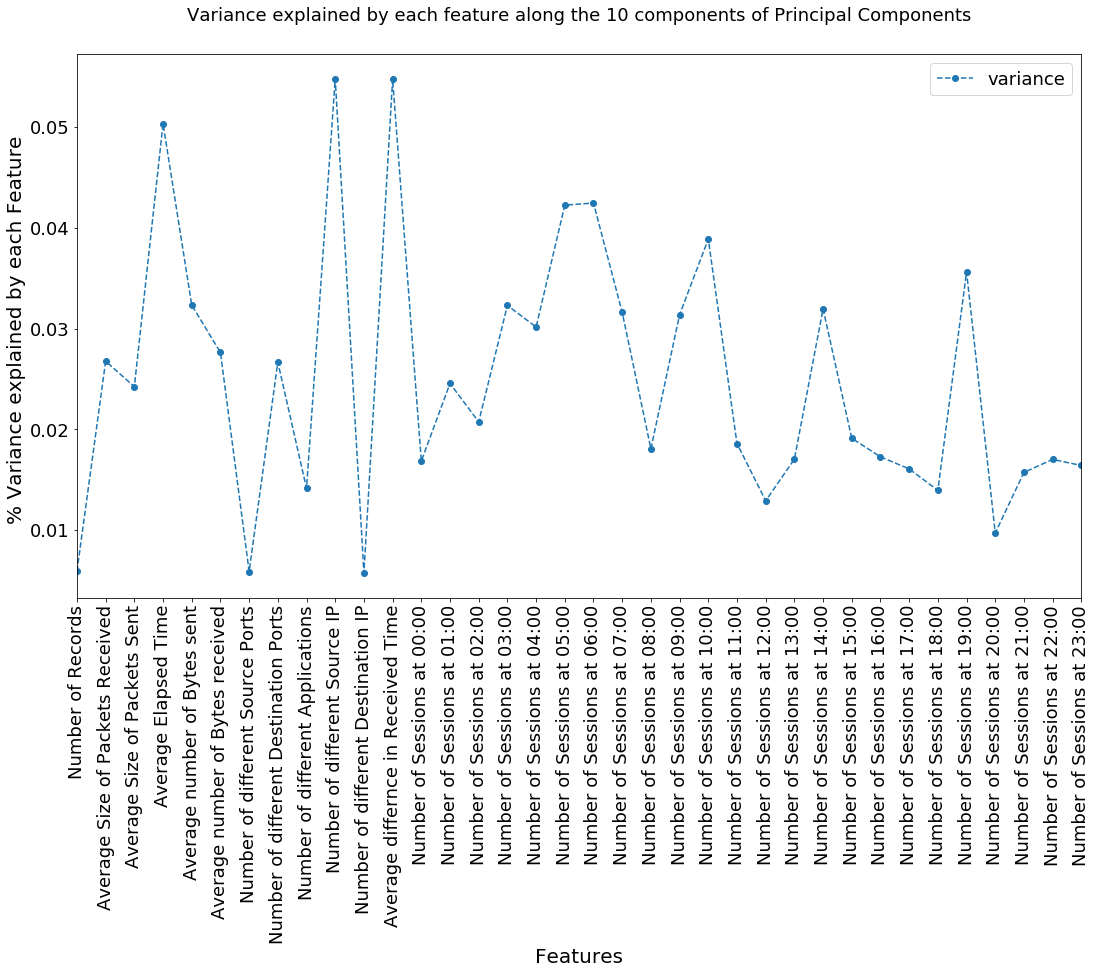

In [61]:
pca_inv_data = pca.components_

fig = plt.figure(figsize=(18, 10))
plt.plot(np.square(pca_inv_data.std(axis=0)), '--o', label = 'variance')
plt.legend(loc='lower right')
plt.ylabel('% Variance explained by each Feature ', fontsize=20)
plt.xlabel('Features', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),orig_X.columns,rotation=90)
plt.title('Variance explained by each feature along the 10 components of Principal Components',size=18,y=1.05)
plt.legend(loc='upper right', fontsize=18)
# plt.savefig('B.jpeg',dpi=1200,bbox_inches = 'tight')
plt.show()

### K-Means

Kmeans on data


Cluster_Labels     0
Infected #      28.0
Uninfected #    28.0
Infected %      50.0
Uninfected %    50.0

Sum of square of distances is: 1.74093609804e+12

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels     0     1
Infected #      22.0   6.0
Uninfected #    22.0   6.0
Infected %      50.0  50.0
Uninfected %    50.0  50.0

Sum of square of distances is: 652344154600.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels     0     1     2
Infected #       6.0   1.0  21.0
Uninfected #     6.0   1.0  21.0
Infected %      50.0  50.0  50.0
Uninfected %    50.0  50.0  50.0

Sum of square of distances is: 224569483820.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels      0      1     2      3
Infected #      13.00   6.00   1.0   8.00
Uninfected #    17.00   5.00   1.0   5.00
Infected %      43.33  54.55  50.0  61.54
Uninfected %    56.67  45.45  50.0  38.46

Sum of square of distances is: 158408261859.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



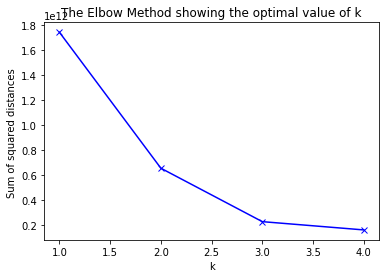

The minimum sum of sqaures of distances is : 158408261859.0  for k 4


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [62]:
print("Kmeans on data")
get_kmeans(X)

### K-Means on scaled data

Kmeans on scaled data


Cluster_Labels     0
Infected #      28.0
Uninfected #    28.0
Infected %      50.0
Uninfected %    50.0

Sum of square of distances is: 2016.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels      0      1
Infected #      17.00  11.00
Uninfected #     6.00  22.00
Infected %      73.91  33.33
Uninfected %    26.09  66.67

Sum of square of distances is: 1288.61843906

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels      0      1     2
Infected #       11.0  10.00   7.0
Uninfected #      0.0  21.00   7.0
Infected %      100.0  32.26  50.0
Uninfected %      0.0  67.74  50.0

Sum of square of distances is: 1078.40953522

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels      0      1      2      3
Infected #       5.00  11.00  11.00    1.0
Uninfected #     6.00   2.00  20.00    0.0
Infected %      45.45  84.62  35.48  100.0
Uninfected %    54.55  15.38  64.52    0.0

Sum of square of distances is: 951.774836627

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



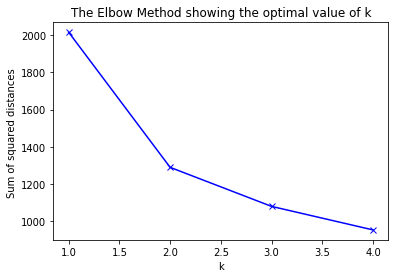

The minimum sum of sqaures of distances is : 951.774836627  for k 4


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [63]:
print("Kmeans on scaled data")
get_kmeans(scaled_X)

### PCA using 3 components on scaled data

The explained variance for pca applied on scaled data is 0.670322670714 using 3 components
Kmeans on sclaed data with PCA using 3 components:


Cluster_Labels     0
Infected #      28.0
Uninfected #    28.0
Infected %      50.0
Uninfected %    50.0

Sum of square of distances is: 165.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels      0      1
Infected #      17.00  11.00
Uninfected #     7.00  21.00
Infected %      70.83  34.38
Uninfected %    29.17  65.62

Sum of square of distances is: 121.023063383

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels      0      1      2
Infected #      11.00  15.00    2.0
Uninfected #    22.00   6.00    0.0
Infected %      33.33  71.43  100.0
Uninfected %    66.67  28.57    0.0

Sum of square of distances is: 83.8841600212

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels     0      1     2      3
Infected #      12.0    2.0   5.0   9.00
Uninfected #    20.0    0.0   3.0   5.00
Infected %      37.5  100.0  62.5  64.29
Uninfected %    62.5    0.0  37.5  35.71

Sum of square of distances is: 58.0393003426

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



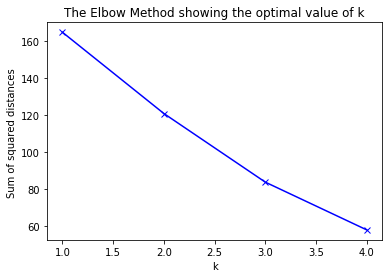

The minimum sum of sqaures of distances is : 58.0393003426  for k 4


In [64]:
pca=PCA(n_components=3,whiten=True,svd_solver='arpack',random_state=0)
X_pca_scaled=pca.fit_transform(scaled_X)
print("The explained variance for pca applied on scaled data is",sum(pca.explained_variance_ratio_),"using 3 components")
print("Kmeans on sclaed data with PCA using 3 components:")
model=get_kmeans(X_pca_scaled)

### PCA on scaled data using 4 components

The explained variance for pca applied on scaled data is 0.728476419594 using 4 components
Kmeans on sclaed data with PCA using 4 components:


Cluster_Labels     0
Infected #      28.0
Uninfected #    28.0
Infected %      50.0
Uninfected %    50.0

Sum of square of distances is: 220.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels      0      1
Infected #      11.00  17.00
Uninfected #     3.00  25.00
Infected %      78.57  40.48
Uninfected %    21.43  59.52

Sum of square of distances is: 175.292891319

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels     0      1      2
Infected #      16.0    1.0  11.00
Uninfected #    26.0    0.0   2.00
Infected %      38.1  100.0  84.62
Uninfected %    61.9    0.0  15.38

Sum of square of distances is: 135.190668505

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels      0      1      2      3
Infected #      12.00  10.00    1.0    5.0
Uninfected #    24.00   4.00    0.0    0.0
Infected %      33.33  71.43  100.0  100.0
Uninfected %    66.67  28.57    0.0    0.0

Sum of square of distances is: 100.189564988

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



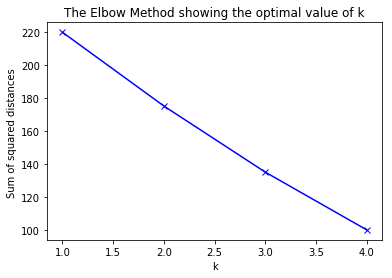

The minimum sum of sqaures of distances is : 100.189564988  for k 4


In [65]:
### PCA on scaled data using 4 components
pca=PCA(n_components=4,whiten=True,svd_solver='arpack',random_state=0)
X_pca_scaled_4=pca.fit_transform(scaled_X)
print("The explained variance for pca applied on scaled data is",sum(pca.explained_variance_ratio_),"using 4 components")
print("Kmeans on sclaed data with PCA using 4 components:")
model=get_kmeans(X_pca_scaled_4)

### PCA on scaled data using 5 components

The explained variance for pca applied on scaled data is 0.774514753001 using 5 components
Kmeans on sclaed data with PCA using 5 components:


Cluster_Labels     0
Infected #      28.0
Uninfected #    28.0
Infected %      50.0
Uninfected %    50.0

Sum of square of distances is: 275.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels      0      1
Infected #      11.00  17.00
Uninfected #     2.00  26.00
Infected %      84.62  39.53
Uninfected %    15.38  60.47

Sum of square of distances is: 230.02635326

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels      0      1      2
Infected #      16.00    1.0  11.00
Uninfected #    25.00    0.0   3.00
Infected %      39.02  100.0  78.57
Uninfected %    60.98    0.0  21.43

Sum of square of distances is: 188.666440408

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels      0     1      2      3
Infected #      15.00   7.0    1.0   5.00
Uninfected #    26.00   1.0    0.0   1.00
Infected %      36.59  87.5  100.0  83.33
Uninfected %    63.41  12.5    0.0  16.67

Sum of square of distances is: 151.604677297

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



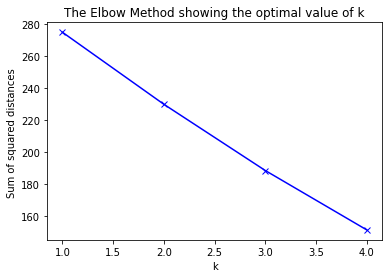

The minimum sum of sqaures of distances is : 151.604677297  for k 4


In [66]:
### PCA on scaled data using 5 components
pca=PCA(n_components=5,whiten=True,random_state=0)
X_pca_scaled_5=pca.fit_transform(scaled_X)
print("The explained variance for pca applied on scaled data is",sum(pca.explained_variance_ratio_),"using 5 components")
print("Kmeans on sclaed data with PCA using 5 components:")
model=get_kmeans(X_pca_scaled_5)

### PCA on scaled data using 6 components

The explained variance for pca applied on scaled data is 0.806821000935 using 6 components
Kmeans on sclaed data with PCA using 6 components:


Cluster_Labels     0
Infected #      28.0
Uninfected #    28.0
Infected %      50.0
Uninfected %    50.0

Sum of square of distances is: 330.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels     0      1
Infected #      23.0    5.0
Uninfected #    28.0    0.0
Infected %      45.1  100.0
Uninfected %    54.9    0.0

Sum of square of distances is: 285.372877392

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels     0      1      2
Infected #      22.0    1.0   5.00
Uninfected #    27.0    0.0   1.00
Infected %      44.9  100.0  83.33
Uninfected %    55.1    0.0  16.67

Sum of square of distances is: 245.756270187

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels      0      1      2      3
Infected #      16.00    1.0    1.0  10.00
Uninfected #     7.00    0.0    0.0  21.00
Infected %      69.57  100.0  100.0  32.26
Uninfected %    30.43    0.0    0.0  67.74

Sum of square of distances is: 208.026047515

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



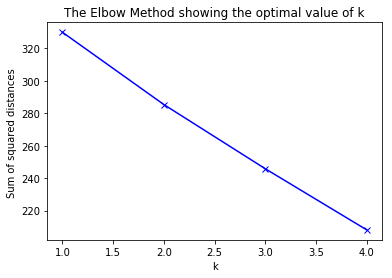

The minimum sum of sqaures of distances is : 208.026047515  for k 4


In [67]:
### PCA on scaled data using 5 components
pca=PCA(n_components=6,whiten=True,random_state=0)
X_pca_scaled_6=pca.fit_transform(scaled_X)
print("The explained variance for pca applied on scaled data is",sum(pca.explained_variance_ratio_),"using 6 components")
print("Kmeans on sclaed data with PCA using 6 components:")
model=get_kmeans(X_pca_scaled_6)

### PCA on scaled data using 9 components

The explained variance for pca applied on scaled data is 0.885332203304 using 9 components
Kmeans on sclaed data with PCA using 9 components:


Cluster_Labels     0
Infected #      28.0
Uninfected #    28.0
Infected %      50.0
Uninfected %    50.0

Sum of square of distances is: 495.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels      0      1
Infected #      20.00   8.00
Uninfected #    25.00   3.00
Infected %      44.44  72.73
Uninfected %    55.56  27.27

Sum of square of distances is: 447.217542826

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels     0      1      2
Infected #      23.0    1.0    4.0
Uninfected #    28.0    0.0    0.0
Infected %      45.1  100.0  100.0
Uninfected %    54.9    0.0    0.0

Sum of square of distances is: 400.223403147

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels      0      1      2      3
Infected #       9.00    1.0  17.00    1.0
Uninfected #     4.00    0.0  24.00    0.0
Infected %      69.23  100.0  41.46  100.0
Uninfected %    30.77    0.0  58.54    0.0

Sum of square of distances is: 357.34382437

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



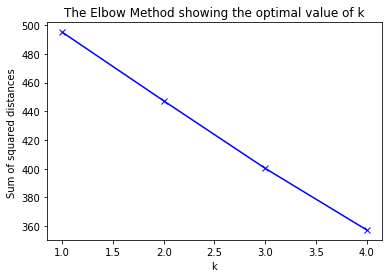

The minimum sum of sqaures of distances is : 357.34382437  for k 4


In [68]:
### PCA on scaled data using 9 components
pca=PCA(n_components=9,whiten=True,random_state=0)
X_pca_scaled_9=pca.fit_transform(scaled_X)
print("The explained variance for pca applied on scaled data is",sum(pca.explained_variance_ratio_),"using 9 components")
print("Kmeans on sclaed data with PCA using 9 components:")
model=get_kmeans(X_pca_scaled_9)

### PCA using 10 components

The explained variance for pca applied on scaled data is 0.901276011846 using 10 components
Kmeans on sclaed data with PCA using 10 components:


Cluster_Labels     0
Infected #      28.0
Uninfected #    28.0
Infected %      50.0
Uninfected %    50.0

Sum of square of distances is: 550.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels      0      1
Infected #      27.00    1.0
Uninfected #    28.00    0.0
Infected %      49.09  100.0
Uninfected %    50.91    0.0

Sum of square of distances is: 500.110060302

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels      0      1      2
Infected #      26.00    1.0    1.0
Uninfected #    28.00    0.0    0.0
Infected %      48.15  100.0  100.0
Uninfected %    51.85    0.0    0.0

Sum of square of distances is: 456.575570676

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels     0      1      2      3
Infected #      23.0    4.0    1.0    0.0
Uninfected #    27.0    0.0    0.0    1.0
Infected %      46.0  100.0  100.0    0.0
Uninfected %    54.0    0.0    0.0  100.0

Sum of square of distances is: 414.243943419

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



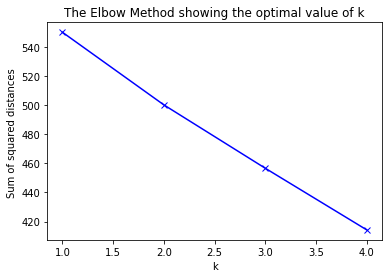

The minimum sum of sqaures of distances is : 414.243943419  for k 4


In [69]:
### PCA on scaled data using 10 components
pca=PCA(n_components=10,whiten=True,random_state=0)
X_pca_scaled_10=pca.fit_transform(scaled_X)
print("The explained variance for pca applied on scaled data is",sum(pca.explained_variance_ratio_),"using 10 components")
print("Kmeans on sclaed data with PCA using 10 components:")
model=get_kmeans(X_pca_scaled_10)

### PCA on scaled data using 11 components

The explained variance for pca applied on scaled data is 0.915756792378 using 11 components
Kmeans on sclaed data with PCA using 11 components:


Cluster_Labels     0
Infected #      28.0
Uninfected #    28.0
Infected %      50.0
Uninfected %    50.0

Sum of square of distances is: 605.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels      0      1
Infected #      27.00    1.0
Uninfected #    28.00    0.0
Infected %      49.09  100.0
Uninfected %    50.91    0.0

Sum of square of distances is: 554.130578825

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels      0      1      2
Infected #      26.00    1.0    1.0
Uninfected #    28.00    0.0    0.0
Infected %      48.15  100.0  100.0
Uninfected %    51.85    0.0    0.0

Sum of square of distances is: 510.093218659

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels      0      1      2      3
Infected #      11.00  15.00    1.0    1.0
Uninfected #    17.00  11.00    0.0    0.0
Infected %      39.29  57.69  100.0  100.0
Uninfected %    60.71  42.31    0.0    0.0

Sum of square of distances is: 466.170706959

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



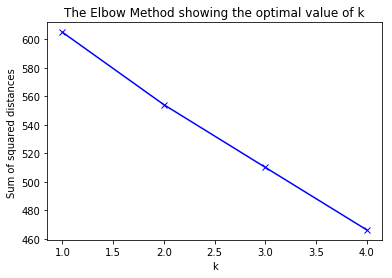

The minimum sum of sqaures of distances is : 466.170706959  for k 4


In [72]:
### PCA on scaled data using 11 components
pca=PCA(n_components=11,whiten=True,random_state=0)
X_pca_scaled_11=pca.fit_transform(scaled_X)
print("The explained variance for pca applied on scaled data is",sum(pca.explained_variance_ratio_),"using 11 components")
print("Kmeans on sclaed data with PCA using 11 components:")
model=get_kmeans(X_pca_scaled_11)

### PCA on scaled data using 12 components

The explained variance for pca applied on scaled data is 0.929239804164 using 12 components
Kmeans on sclaed data with PCA using 12 components:


Cluster_Labels     0
Infected #      28.0
Uninfected #    28.0
Infected %      50.0
Uninfected %    50.0

Sum of square of distances is: 660.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels      0      1
Infected #      27.00    1.0
Uninfected #    28.00    0.0
Infected %      49.09  100.0
Uninfected %    50.91    0.0

Sum of square of distances is: 608.744083255

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels      0      1      2
Infected #      12.00    1.0  15.00
Uninfected #    16.00    0.0  12.00
Infected %      42.86  100.0  55.56
Uninfected %    57.14    0.0  44.44

Sum of square of distances is: 565.448850579

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels      0      1      2      3
Infected #      11.00  15.00    1.0    1.0
Uninfected #    15.00  13.00    0.0    0.0
Infected %      42.31  53.57  100.0  100.0
Uninfected %    57.69  46.43    0.0    0.0

Sum of square of distances is: 521.22154796

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



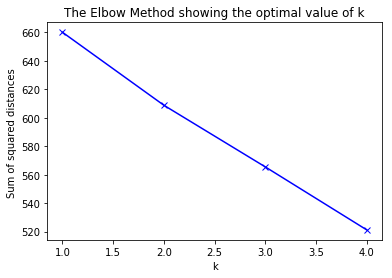

The minimum sum of sqaures of distances is : 521.22154796  for k 4


In [73]:
### PCA on scaled data using 12 components
pca=PCA(n_components=12,whiten=True,random_state=0)
X_pca_scaled_12=pca.fit_transform(scaled_X)
print("The explained variance for pca applied on scaled data is",sum(pca.explained_variance_ratio_),"using 12 components")
print("Kmeans on sclaed data with PCA using 12 components:")
model=get_kmeans(X_pca_scaled_12)

### PCA on scaled data using 13 components

The explained variance for pca applied on scaled data is 0.940744558134 using 13 components
Kmeans on sclaed data with PCA using 13 components:


Cluster_Labels     0
Infected #      28.0
Uninfected #    28.0
Infected %      50.0
Uninfected %    50.0

Sum of square of distances is: 715.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels      0      1
Infected #      27.00    1.0
Uninfected #    28.00    0.0
Infected %      49.09  100.0
Uninfected %    50.91    0.0

Sum of square of distances is: 663.302049303

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels      0      1      2
Infected #      26.00    1.0    1.0
Uninfected #    28.00    0.0    0.0
Infected %      48.15  100.0  100.0
Uninfected %    51.85    0.0    0.0

Sum of square of distances is: 618.540242141

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels      0      1      2      3
Infected #      11.00  15.00    1.0    1.0
Uninfected #    17.00  11.00    0.0    0.0
Infected %      39.29  57.69  100.0  100.0
Uninfected %    60.71  42.31    0.0    0.0

Sum of square of distances is: 575.37541437

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



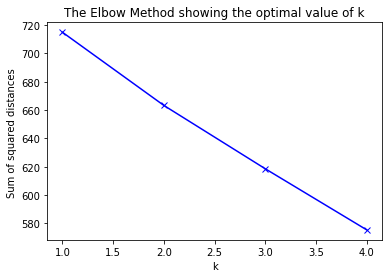

The minimum sum of sqaures of distances is : 575.37541437  for k 4


In [74]:
### PCA on scaled data using 13 components
pca=PCA(n_components=13,whiten=True,random_state=0)
X_pca_scaled_13=pca.fit_transform(scaled_X)
print("The explained variance for pca applied on scaled data is",sum(pca.explained_variance_ratio_),"using 13 components")
print("Kmeans on sclaed data with PCA using 13 components:")
model=get_kmeans(X_pca_scaled_13)

<h2>2. <a id='2' style="text-decoration : none; color : #000000;"> 70:30 Infected/Uninfected Users</a></h2>

In [87]:
z=pd.read_csv('Feature_with_Hour_Class_70_30.csv')
z.set_index(['Source_User'],drop=True,inplace=True)
print("Infected/Uninfected Users")
z.Target.value_counts()

Infected/Uninfected Users


0    2832
1    1215
Name: Target, dtype: int64

In [88]:
z.reset_index(inplace=True)
x=z[(z.Target==1)&(z.Source_User.isin(no_med))]
y=z[(z.Target==0)]
y=y.sample(n=65)
z=(x.append(y))
z.set_index(['Source_User'],drop=True,inplace=True)

In [89]:
z.Target.value_counts()

0    65
1    28
Name: Target, dtype: int64

### feature Set

In [90]:
X=z.iloc[:,z.columns!='Target']
X.columns=['Number of Records','Average Size of Packets Received','Average Size of Packets Sent','Average Elapsed Time',
           'Average number of Bytes sent', 'Average number of Bytes received','Number of different Source Ports',
           'Number of different Destination Ports', 'Number of different Applications','Number of different Source IP',
           'Number of different Destination IP','Average differnce in Received Time',
          'Number of Sessions at 00:00','Number of Sessions at 01:00','Number of Sessions at 02:00','Number of Sessions at 03:00',
          'Number of Sessions at 04:00','Number of Sessions at 05:00','Number of Sessions at 06:00',
          'Number of Sessions at 07:00','Number of Sessions at 08:00','Number of Sessions at 09:00',
          'Number of Sessions at 10:00','Number of Sessions at 11:00','Number of Sessions at 12:00',
          'Number of Sessions at 13:00','Number of Sessions at 14:00','Number of Sessions at 15:00',
          'Number of Sessions at 16:00','Number of Sessions at 17:00','Number of Sessions at 18:00',
          'Number of Sessions at 19:00','Number of Sessions at 20:00','Number of Sessions at 21:00',
          'Number of Sessions at 22:00','Number of Sessions at 23:00']
X.head(2)

Number of Records  \
Source_User                                                             
cef0d1cb38af8ad44a4c03c5718984ae948de73fefefc7f...               3431   
f55a241cd8a27c7392b8ab9049495758f6895fefa5538e8...                122   

                                                    Average Size of Packets Received  \
Source_User                                                                            
cef0d1cb38af8ad44a4c03c5718984ae948de73fefefc7f...                         19.310114   
f55a241cd8a27c7392b8ab9049495758f6895fefa5538e8...                         66.729508   

                                                    Average Size of Packets Sent  \
Source_User                                                                        
cef0d1cb38af8ad44a4c03c5718984ae948de73fefefc7f...                     15.713495   
f55a241cd8a27c7392b8ab9049495758f6895fefa5538e8...                     25.926230   

                                                    Average Elapsed Time  \
Source_User                                                                
cef0d1cb38af8ad44a4c03c5718984ae948de73fefefc7f...             53.660740   
f55a241cd8a27c7392b8ab9049495758f6895fefa5538e8...             35.967213   

                                                    Average number of Bytes sent  \
Source_User                                                                        
cef0d1cb38af8ad44a4c03c5718984ae948de73fefefc7f...                   3199.904401   
f55a241cd8a27c7392b8ab9049495758f6895fefa5538e8...                   2352.598361   

                                                    Average number of Bytes received  \
Source_User                                                                            
cef0d1cb38af8ad44a4c03c5718984ae948de73fefefc7f...                      18265.944331   
f55a241cd8a27c7392b8ab9049495758f6895fefa5538e8...                      81478.516393   

                                                    Number of different Source Ports  \
Source_User                                                                            
cef0d1cb38af8ad44a4c03c5718984ae948de73fefefc7f...                            3030.0   
f55a241cd8a27c7392b8ab9049495758f6895fefa5538e8...                             121.0   

                                                    Number of different Destination Ports  \
Source_User                                                                                 
cef0d1cb38af8ad44a4c03c5718984ae948de73fefefc7f...                                   12.0   
f55a241cd8a27c7392b8ab9049495758f6895fefa5538e8...                                    7.0   

                                                    Number of different Applications  \
Source_User                                                                            
cef0d1cb38af8ad44a4c03c5718984ae948de73fefefc7f...                                33   
f55a241cd8a27c7392b8ab9049495758f6895fefa5538e8...                                17   

                                                    Number of different Source IP  \
Source_User                                                                         
cef0d1cb38af8ad44a4c03c5718984ae948de73fefefc7f...                             17   
f55a241cd8a27c7392b8ab9049495758f6895fefa5538e8...                             13   

                                                    Number of different Destination IP  \
Source_User                                                                              
cef0d1cb38af8ad44a4c03c5718984ae948de73fefefc7f...                                 679   
f55a241cd8a27c7392b8ab9049495758f6895fefa5538e8...                                  45   

                                                    Average differnce in Received Time  \
Source_User                                                                              
cef0d1cb38af8ad44a4c03c5718984ae948de73fefefc7f...                          775.593413   
f55a241cd8a27c7392b8ab9

In [91]:
target=z.Target.reset_index(drop=True)

### Scaled X

In [92]:
orig_X=X.copy()
X=X.values
scaler_X=StandardScaler()
scaler_X.fit(X)
scaled_X=scaler_X.transform(X)

In [93]:
scaled_X[0:2]

array([[ 2.35488162, -0.57698662, -0.7013128 , -0.8016562 , -0.61952098,
        -0.55717337,  2.20003185, -0.07127013,  0.68488463, -0.5378262 ,
         1.54684606, -0.40798874,  0.56279005,  0.76929582,  1.38939125,
         1.1797969 ,  3.5686225 ,  3.01804744,  1.19676185,  0.6353974 ,
         5.40837218,  1.76804038,  5.50206596,  3.8733225 ,  1.30722456,
         1.83996435,  2.65680053,  1.16312207,  0.6372383 ,  2.45115616,
         0.4846077 , -0.30018166,  0.75191324,  0.12716713,  0.07027305,
        -0.06255406],
       [-0.85804042, -0.28556274, -0.53230458, -1.14209992, -0.70647519,
        -0.25705257, -0.86685132, -0.18210828, -0.67755966, -0.79833577,
        -0.94135848,  0.37059438, -0.46612002, -0.32584396, -0.50808768,
        -0.52606615, -0.29489534, -0.51715224, -0.38738616, -0.5812901 ,
        -0.5623481 , -0.74741134, -0.62432932, -0.79444784, -0.99745571,
        -0.98169741, -0.79874216, -0.43996713, -0.8947346 , -0.8895823 ,
        -0.74559876, -0.61473

In [94]:
def get_purity(labels):
    d=pd.DataFrame(labels).join(target)
    d.columns=['Cluster_Labels','Target']
    d=d.groupby(['Cluster_Labels','Target']).agg({'Target':len}).unstack().fillna(0).transpose()
    q=d.apply(lambda x: x/x.sum()*100,axis=0)
    mt=d.append(q)
    mt.index=['Infected #','Uninfected #','Infected %','Uninfected %']
    display(mt.round(2))
   
    
def get_kmeans(data):
    distortions=[]
    for i in range(1,5):
        kmeanModel=KMeans(n_clusters=i,random_state=0)
        kmeanModel.fit(data)
        distortions.append(kmeanModel.inertia_)
        get_purity(kmeanModel.labels_)
        print("Sum of square of distances is:",kmeanModel.inertia_)
        print("\n---------------------------------------------------------------------------------------------------------\n")
        print("---------------------------------------------------------------------------------------------------------\n")
    plt.plot(np.arange(1,5), distortions, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Sum of squared distances ')
    plt.title('The Elbow Method showing the optimal value of k')
    plt.show()
    print("The minimum sum of sqaures of distances is :",min(distortions)," for k",distortions.index(min(distortions))+1)
    return kmeanModel

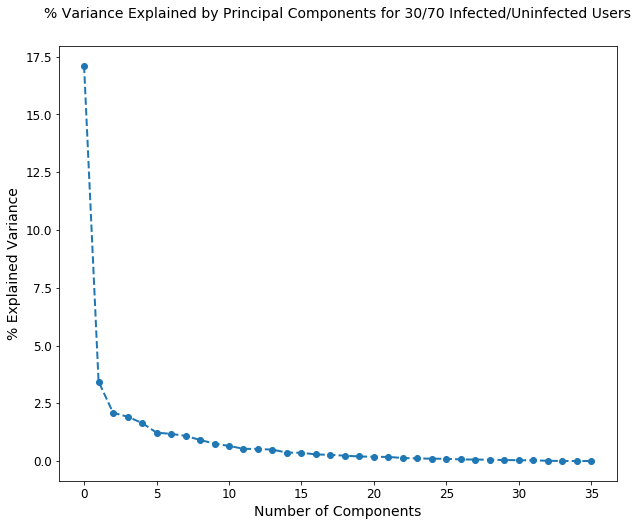

In [97]:
pca = PCA(random_state=0)
pca.fit(scaled_X)
plt.figure(1, figsize=(10, 8))
plt.clf()
plt.plot(pca.explained_variance_,'--o', linewidth=2)
plt.axis('tight')
plt.xlabel('Number of Components',size=14)
plt.xticks(size=12)
plt.ylabel('% Explained Variance',size=14)
plt.yticks(size=12)
plt.title('% Variance Explained by Principal Components for 30/70 Infected/Uninfected Users',size=14,y=1.05)
# plt.savefig('D.jpeg',dpi=1200)
plt.show()

In [98]:
d=pca.explained_variance_
print("Component\t%Explained Variance\tDecrease in % Explained Variance")
for x in range(0, len(d)):
    if x==0:
        print(x+1,"\t\t",np.round(d[x],5),"\t\t",0)
    else:
        print(x+1,"\t\t",np.round(d[x],5),"\t\t",((d[x-1]-d[x])*100/d[x-1]))

Component	%Explained Variance	Decrease in % Explained Variance
1 		 17.11269 		 0
2 		 3.44085 		 79.8929865774
3 		 2.09086 		 39.2342770965
4 		 1.91855 		 8.24116696884
5 		 1.64941 		 14.0280615666
6 		 1.22838 		 25.5262302279
7 		 1.17609 		 4.25714413918
8 		 1.09063 		 7.26582190885
9 		 0.91285 		 16.3013547887
10 		 0.75349 		 17.4568961297
11 		 0.65408 		 13.1927257142
12 		 0.52994 		 18.9800636532
13 		 0.52206 		 1.48737811592
14 		 0.49336 		 5.49654534735
15 		 0.36537 		 25.9420281294
16 		 0.35624 		 2.49978228396
17 		 0.2875 		 19.2962377998
18 		 0.26599 		 7.48234666536
19 		 0.23206 		 12.7545063042
20 		 0.19703 		 15.0949853765
21 		 0.18414 		 6.54331162643
22 		 0.1771 		 3.82503181109
23 		 0.13166 		 25.6555895747
24 		 0.11325 		 13.9852280007
25 		 0.10018 		 11.5361348347
26 		 0.09895 		 1.23571514483
27 		 0.06883 		 30.4343424712
28 		 0.0641 		 6.87874816807
29 		 0.05597 		 12.6859624158
30 		 0.04338 		 22.483316745
31 		 0.03458 		 20.2950018562


#### I think that we should take 15 components because the variance explained with it is 93.26%. In addition ,we can see from the table above that after 15 components the addition in explained variance with each component is flattedned out ecept few sudeen increases.

In [100]:
pca=PCA(n_components=15,random_state=0)
X_pca1_15=pca.fit_transform(scaled_X)
print("Table for components of PCA when using 15 components with explained variance of",sum(pca.explained_variance_ratio_))
m=pd.DataFrame(pca.components_,columns=orig_X.columns,index = ['PC-1','PC-2','PC-3','PC-4','PC-5','PC-6','PC-7','PC-8','PC-9',
                                                              'PC-10','PC-11','PC-12','PC-13','PC-14','PC-15'])
m

Table for components of PCA when using 15 components with explained variance of 0.932602177457


Number of Records  Average Size of Packets Received  \
PC-1            0.240832                          0.036842   
PC-2           -0.031500                          0.496420   
PC-3           -0.070413                         -0.038328   
PC-4           -0.002639                          0.150553   
PC-5            0.006942                          0.117808   
PC-6           -0.033495                          0.039164   
PC-7            0.037277                          0.107544   
PC-8           -0.020561                         -0.040279   
PC-9            0.005798                          0.010996   
PC-10          -0.000532                         -0.118432   
PC-11          -0.006406                          0.051257   
PC-12          -0.014999                          0.137951   
PC-13           0.007907                          0.127393   
PC-14          -0.017435                          0.061718   
PC-15          -0.010859                         -0.004936   

       Average Size of Packets Sent  Average Elapsed Time  \
PC-1                       0.040028              0.007070   
PC-2                       0.489762              0.009762   
PC-3                      -0.006739              0.354211   
PC-4                       0.131592             -0.285928   
PC-5                       0.103303              0.408632   
PC-6                       0.026757             -0.175378   
PC-7                       0.012212              0.280769   
PC-8                      -0.046768             -0.167382   
PC-9                      -0.023600             -0.004105   
PC-10                      0.021832             -0.035176   
PC-11                      0.072192             -0.149052   
PC-12                      0.033398              0.139267   
PC-13                      0.046776             -0.083915   
PC-14                     -0.058180             -0.316665   
PC-15                     -0.031014              0.217829   

       Average number of Bytes sent  Average number of Bytes received  \
PC-1                       0.052863                          0.035306   
PC-2                       0.378044                          0.495130   
PC-3                      -0.021237                         -0.038494   
PC-4                      -0.033182                          0.151021   
PC-5                      -0.038018                          0.121963   
PC-6                      -0.149729                          0.047120   
PC-7                      -0.243234                          0.110270   
PC-8                      -0.046353                         -0.046863   
PC-9                       0.056180                          0.006997   
PC-10                      0.413649                         -0.126121   
PC-11                     -0.157021                          0.054640   
PC-12                     -0.400656                          0.126593   
PC-13                     -0.333276                          0.139997   
PC-14                     -0.016195                          0.056510   
PC-15                     -0.100993                          0.010709   

       Number of different Source Ports  \
PC-1                           0.240483   
PC-2                          -0.025640   
PC-3                          -0.082749   
PC-4                          -0.003180   
PC-5                          -0.002580   
PC-6                          -0.034893   
PC-7                           0.033275   
PC-8                          -0.009262   
PC-9                          -0.007087   
PC-10                         -0.009545   
PC-11                          0.007618   
PC-12                         -0.008414   
PC-13                         -0.017315   
PC-14                         -0.033663   
PC-15                          0.007836   

       Number of different Destination Ports  \
PC-1                                0.035639   
PC-2                               -0.040462   
PC-3                               

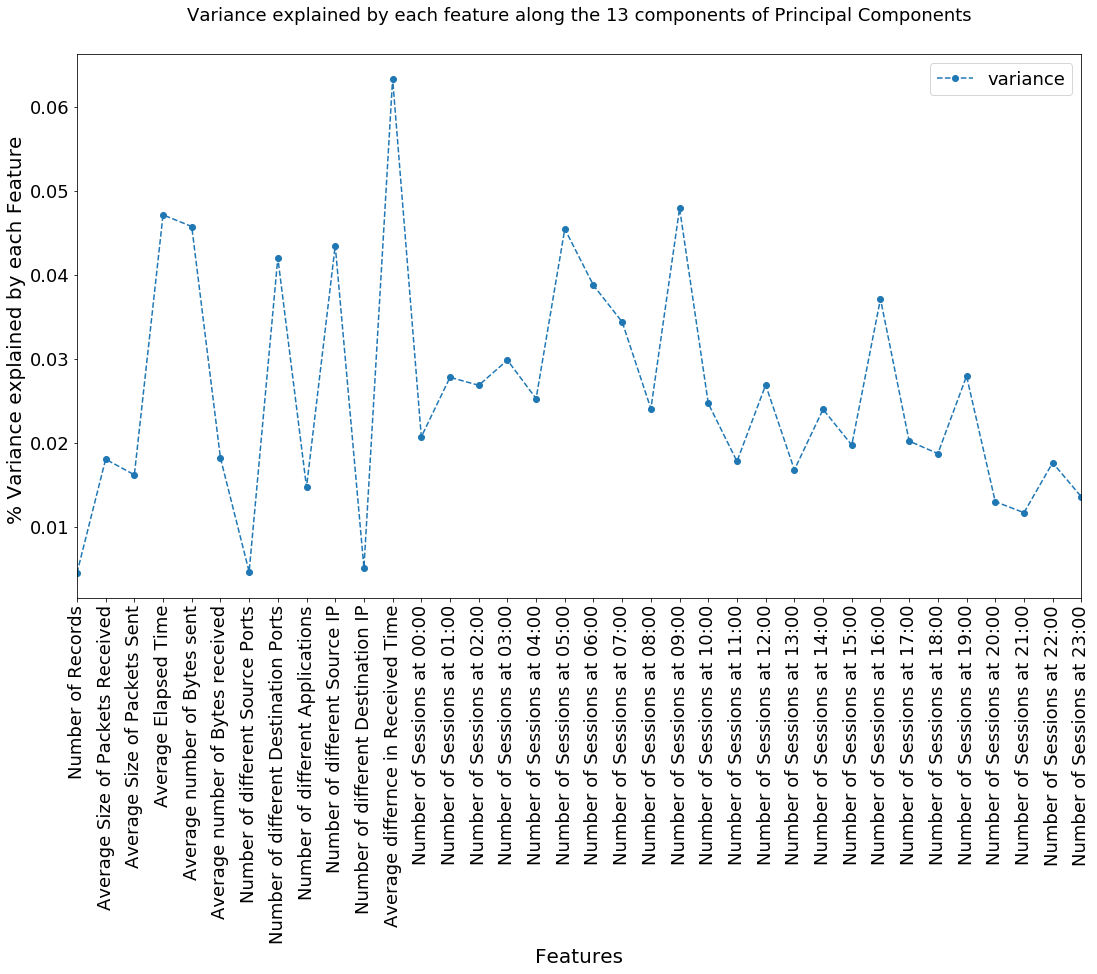

In [101]:
pca_inv_data = pca.components_

fig = plt.figure(figsize=(18, 10))
plt.plot(np.square(pca_inv_data.std(axis=0)), '--o', label = 'variance')
plt.legend(loc='lower right')
plt.ylabel('% Variance explained by each Feature ', fontsize=20)
plt.xlabel('Features', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),orig_X.columns,rotation=90)
plt.title('Variance explained by each feature along the 13 components of Principal Components',size=18,y=1.05)
plt.legend(loc='upper right', fontsize=18)
# plt.savefig('E.jpeg',dpi=1200,bbox_inches = 'tight')
plt.show()

### K-Means

Kmeans on data


Cluster_Labels      0
Infected #      65.00
Uninfected #    28.00
Infected %      69.89
Uninfected %    30.11

Sum of square of distances is: 4.19482121528e+12

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels      0      1
Infected #      60.00   5.00
Uninfected #    27.00   1.00
Infected %      68.97  83.33
Uninfected %    31.03  16.67

Sum of square of distances is: 1.49033994355e+12

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels      0      1      2
Infected #      55.00   7.00    3.0
Uninfected #    22.00   6.00    0.0
Infected %      71.43  53.85  100.0
Uninfected %    28.57  46.15    0.0

Sum of square of distances is: 722855487418.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels      0      1     2     3
Infected #      51.00    1.0   4.0   9.0
Uninfected #    21.00    0.0   1.0   6.0
Infected %      70.83  100.0  80.0  60.0
Uninfected %    29.17    0.0  20.0  40.0

Sum of square of distances is: 387911517950.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



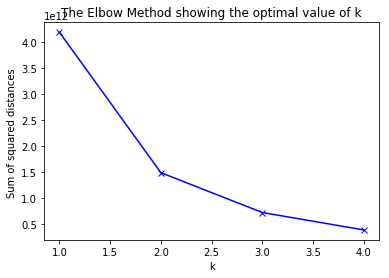

The minimum sum of sqaures of distances is : 387911517950.0  for k 4


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [102]:
print("Kmeans on data")
get_kmeans(X)

### K-Means on scaled data

Kmeans on scaled data


Cluster_Labels      0
Infected #      65.00
Uninfected #    28.00
Infected %      69.89
Uninfected %    30.11

Sum of square of distances is: 3348.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels      0      1
Infected #      48.00  17.00
Uninfected #    15.00  13.00
Infected %      76.19  56.67
Uninfected %    23.81  43.33

Sum of square of distances is: 2236.12008849

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels      0      1      2
Infected #       7.00  36.00  22.00
Uninfected #    10.00  10.00   8.00
Infected %      41.18  78.26  73.33
Uninfected %    58.82  21.74  26.67

Sum of square of distances is: 1918.0443931

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels      0     1      2      3
Infected #       4.00   4.0  37.00  20.00
Uninfected #     3.00   1.0  10.00  14.00
Infected %      57.14  80.0  78.72  58.82
Uninfected %    42.86  20.0  21.28  41.18

Sum of square of distances is: 1743.16764428

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



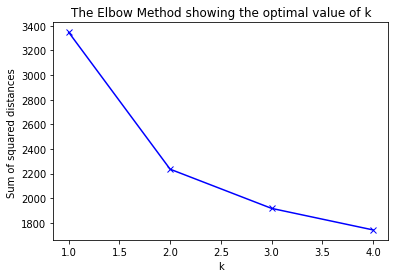

The minimum sum of sqaures of distances is : 1743.16764428  for k 4


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [103]:
print("Kmeans on scaled data")
get_kmeans(scaled_X)

### PCA using 3 components on scaled data

The explained variance for pca applied on scaled data is 0.622247567792 using 3 components
Kmeans on sclaed data with PCA using 3 components:


Cluster_Labels      0
Infected #      65.00
Uninfected #    28.00
Infected %      69.89
Uninfected %    30.11

Sum of square of distances is: 276.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels      0      1
Infected #      44.00  21.00
Uninfected #    13.00  15.00
Infected %      77.19  58.33
Uninfected %    22.81  41.67

Sum of square of distances is: 202.410911078

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels     0     1     2
Infected #      45.0  14.0   6.0
Uninfected #    15.0  11.0   2.0
Infected %      75.0  56.0  75.0
Uninfected %    25.0  44.0  25.0

Sum of square of distances is: 145.954605513

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels      0      1     2      3
Infected #      48.00   8.00   6.0   3.00
Uninfected #    15.00   7.00   2.0   4.00
Infected %      76.19  53.33  75.0  42.86
Uninfected %    23.81  46.67  25.0  57.14

Sum of square of distances is: 110.68690019

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



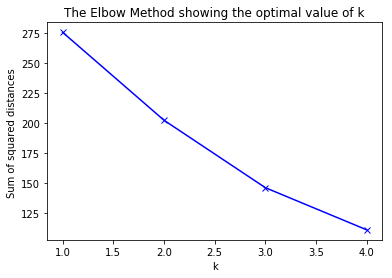

The minimum sum of sqaures of distances is : 110.68690019  for k 4


In [104]:
pca=PCA(n_components=3,whiten=True,svd_solver='arpack',random_state=0)
X_pca_scaled=pca.fit_transform(scaled_X)
print("The explained variance for pca applied on scaled data is",sum(pca.explained_variance_ratio_),"using 3 components")
print("Kmeans on sclaed data with PCA using 3 components:")
model=get_kmeans(X_pca_scaled)

### PCA on scaled data using 4 components

The explained variance for pca applied on scaled data is 0.674967496549 using 4 components
Kmeans on sclaed data with PCA using 4 components:


Cluster_Labels      0
Infected #      65.00
Uninfected #    28.00
Infected %      69.89
Uninfected %    30.11

Sum of square of distances is: 368.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels      0      1
Infected #      12.00  53.00
Uninfected #    10.00  18.00
Infected %      54.55  74.65
Uninfected %    45.45  25.35

Sum of square of distances is: 293.276914051

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels      0      1     2
Infected #      43.00   7.00  15.0
Uninfected #    13.00   5.00  10.0
Infected %      76.79  58.33  60.0
Uninfected %    23.21  41.67  40.0

Sum of square of distances is: 230.544809545

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels      0     1      2     3
Infected #      48.00   3.0   8.00   6.0
Uninfected #    15.00   5.0   6.00   2.0
Infected %      76.19  37.5  57.14  75.0
Uninfected %    23.81  62.5  42.86  25.0

Sum of square of distances is: 171.078411265

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



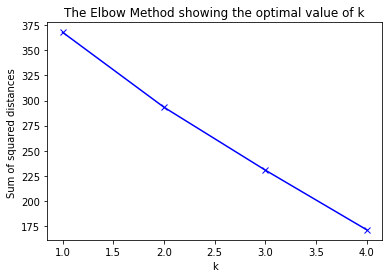

The minimum sum of sqaures of distances is : 171.078411265  for k 4


In [105]:
### PCA on scaled data using 4 components
pca=PCA(n_components=4,whiten=True,svd_solver='arpack',random_state=0)
X_pca_scaled_4=pca.fit_transform(scaled_X)
print("The explained variance for pca applied on scaled data is",sum(pca.explained_variance_ratio_),"using 4 components")
print("Kmeans on sclaed data with PCA using 4 components:")
model=get_kmeans(X_pca_scaled_4)

### PCA on scaled data using 5 components

The explained variance for pca applied on scaled data is 0.720291841242 using 5 components
Kmeans on sclaed data with PCA using 5 components:


Cluster_Labels      0
Infected #      65.00
Uninfected #    28.00
Infected %      69.89
Uninfected %    30.11

Sum of square of distances is: 460.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels      0      1
Infected #      64.00    1.0
Uninfected #    28.00    0.0
Infected %      69.57  100.0
Uninfected %    30.43    0.0

Sum of square of distances is: 388.337412883

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels      0      1     2
Infected #      52.00   7.00   6.0
Uninfected #    20.00   6.00   2.0
Infected %      72.22  53.85  75.0
Uninfected %    27.78  46.15  25.0

Sum of square of distances is: 320.603117301

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels      0      1      2      3
Infected #       6.00  15.00    1.0  43.00
Uninfected #     1.00  14.00    0.0  13.00
Infected %      85.71  51.72  100.0  76.79
Uninfected %    14.29  48.28    0.0  23.21

Sum of square of distances is: 252.049091946

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



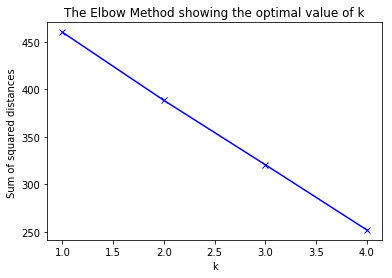

The minimum sum of sqaures of distances is : 252.049091946  for k 4


In [106]:
### PCA on scaled data using 5 components
pca=PCA(n_components=5,whiten=True,svd_solver='arpack',random_state=0)
X_pca_scaled_5=pca.fit_transform(scaled_X)
print("The explained variance for pca applied on scaled data is",sum(pca.explained_variance_ratio_),"using 5 components")
print("Kmeans on sclaed data with PCA using 5 components:")
model=get_kmeans(X_pca_scaled_5)

### PCA on scaled data using 6 components

The explained variance for pca applied on scaled data is 0.75404658936 using 6 components
Kmeans on sclaed data with PCA using 6 components:


Cluster_Labels      0
Infected #      65.00
Uninfected #    28.00
Infected %      69.89
Uninfected %    30.11

Sum of square of distances is: 552.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels      0      1
Infected #      51.00  14.00
Uninfected #    18.00  10.00
Infected %      73.91  58.33
Uninfected %    26.09  41.67

Sum of square of distances is: 475.107267272

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels      0      1     2
Infected #      46.00  14.00   5.0
Uninfected #    13.00  10.00   5.0
Infected %      77.97  58.33  50.0
Uninfected %    22.03  41.67  50.0

Sum of square of distances is: 415.453340736

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels      0      1      2      3
Infected #       6.00  40.00  18.00    1.0
Uninfected #     5.00  12.00  11.00    0.0
Infected %      54.55  76.92  62.07  100.0
Uninfected %    45.45  23.08  37.93    0.0

Sum of square of distances is: 349.086742885

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



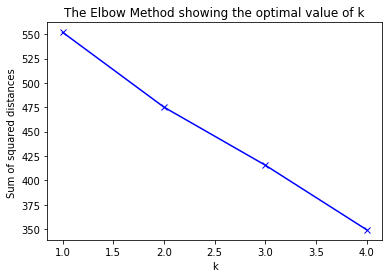

The minimum sum of sqaures of distances is : 349.086742885  for k 4


In [107]:
### PCA on scaled data using 5 components
pca=PCA(n_components=6,whiten=True,svd_solver='arpack',random_state=0)
X_pca_scaled_6=pca.fit_transform(scaled_X)
print("The explained variance for pca applied on scaled data is",sum(pca.explained_variance_ratio_),"using 6 components")
print("Kmeans on sclaed data with PCA using 6 components:")
model=get_kmeans(X_pca_scaled_6)

### PCA on scaled data using 9 components

The explained variance for pca applied on scaled data is 0.841418114834 using 9 components
Kmeans on sclaed data with PCA using 9 components:


Cluster_Labels      0
Infected #      65.00
Uninfected #    28.00
Infected %      69.89
Uninfected %    30.11

Sum of square of distances is: 828.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels      0      1
Infected #      64.00    1.0
Uninfected #    28.00    0.0
Infected %      69.57  100.0
Uninfected %    30.43    0.0

Sum of square of distances is: 752.104486663

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels      0     1      2
Infected #      42.00   6.0  17.00
Uninfected #    12.00   6.0  10.00
Infected %      77.78  50.0  62.96
Uninfected %    22.22  50.0  37.04

Sum of square of distances is: 691.042319991

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels     0      1      2      3
Infected #       6.0  12.00  46.00    1.0
Uninfected #     2.0   9.00  17.00    0.0
Infected %      75.0  57.14  73.02  100.0
Uninfected %    25.0  42.86  26.98    0.0

Sum of square of distances is: 614.899061651

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



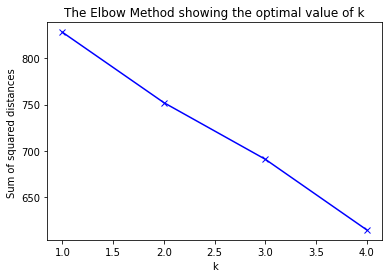

The minimum sum of sqaures of distances is : 614.899061651  for k 4


In [108]:
### PCA on scaled data using 9 components
pca=PCA(n_components=9,whiten=True,svd_solver='arpack',random_state=0)
X_pca_scaled_9=pca.fit_transform(scaled_X)
print("The explained variance for pca applied on scaled data is",sum(pca.explained_variance_ratio_),"using 9 components")
print("Kmeans on sclaed data with PCA using 9 components:")
model=get_kmeans(X_pca_scaled_9)

### PCA on scaled data using 11 components

The explained variance for pca applied on scaled data is 0.880097012115 using 11 components
Kmeans on sclaed data with PCA using 11 components:


Cluster_Labels      0
Infected #      65.00
Uninfected #    28.00
Infected %      69.89
Uninfected %    30.11

Sum of square of distances is: 1012.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels      0      1
Infected #      64.00    1.0
Uninfected #    28.00    0.0
Infected %      69.57  100.0
Uninfected %    30.43    0.0

Sum of square of distances is: 940.227673572

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels      0     1      2
Infected #      51.00   1.0  13.00
Uninfected #    18.00   1.0   9.00
Infected %      73.91  50.0  59.09
Uninfected %    26.09  50.0  40.91

Sum of square of distances is: 868.869772141

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels     0      1      2      3
Infected #       1.0  63.00    1.0    0.0
Uninfected #     1.0  26.00    0.0    1.0
Infected %      50.0  70.79  100.0    0.0
Uninfected %    50.0  29.21    0.0  100.0

Sum of square of distances is: 792.607458538

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



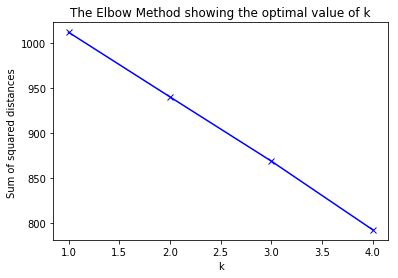

The minimum sum of sqaures of distances is : 792.607458538  for k 4


In [109]:
### PCA on scaled data using 11 components
pca=PCA(n_components=11,whiten=True,svd_solver='arpack',random_state=0)
X_pca_scaled_11=pca.fit_transform(scaled_X)
print("The explained variance for pca applied on scaled data is",sum(pca.explained_variance_ratio_),"using 11 components")
print("Kmeans on sclaed data with PCA using 11 components:")
model=get_kmeans(X_pca_scaled_11)

### PCA on scaled data using 12 components

The explained variance for pca applied on scaled data is 0.894659256587 using 12 components
Kmeans on sclaed data with PCA using 12 components:


Cluster_Labels      0
Infected #      65.00
Uninfected #    28.00
Infected %      69.89
Uninfected %    30.11

Sum of square of distances is: 1104.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels      0      1
Infected #      64.00    1.0
Uninfected #    28.00    0.0
Infected %      69.57  100.0
Uninfected %    30.43    0.0

Sum of square of distances is: 1024.73457102

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels      0      1      2
Infected #        0.0  46.00  19.00
Uninfected #      1.0  14.00  13.00
Infected %        0.0  76.67  59.38
Uninfected %    100.0  23.33  40.62

Sum of square of distances is: 951.052194784

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels      0     1      2      3
Infected #      59.00   4.0    2.0    0.0
Uninfected #    23.00   4.0    0.0    1.0
Infected %      71.95  50.0  100.0    0.0
Uninfected %    28.05  50.0    0.0  100.0

Sum of square of distances is: 875.876779496

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



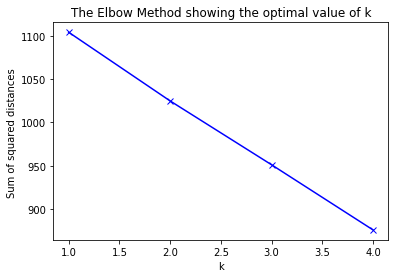

The minimum sum of sqaures of distances is : 875.876779496  for k 4


In [110]:
### PCA on scaled data using 12 components
pca=PCA(n_components=12,whiten=True,svd_solver='arpack',random_state=0)
X_pca_scaled_12=pca.fit_transform(scaled_X)
print("The explained variance for pca applied on scaled data is",sum(pca.explained_variance_ratio_),"using 12 components")
print("Kmeans on sclaed data with PCA using 12 components:")
model=get_kmeans(X_pca_scaled_12)

### PCA on scaled data using 13 components

The explained variance for pca applied on scaled data is 0.909004905422 using 13 components
Kmeans on sclaed data with PCA using 13 components:


Cluster_Labels      0
Infected #      65.00
Uninfected #    28.00
Infected %      69.89
Uninfected %    30.11

Sum of square of distances is: 1196.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels      0      1
Infected #        4.0  61.00
Uninfected #      0.0  28.00
Infected %      100.0  68.54
Uninfected %      0.0  31.46

Sum of square of distances is: 1120.95555213

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels      0      1     2
Infected #        0.0  50.00  15.0
Uninfected #      1.0  17.00  10.0
Infected %        0.0  74.63  60.0
Uninfected %    100.0  25.37  40.0

Sum of square of distances is: 1036.98447931

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels      0      1     2      3
Infected #        0.0   8.00  57.0    0.0
Uninfected #      1.0   7.00  19.0    1.0
Infected %        0.0  53.33  75.0    0.0
Uninfected %    100.0  46.67  25.0  100.0

Sum of square of distances is: 968.472234779

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



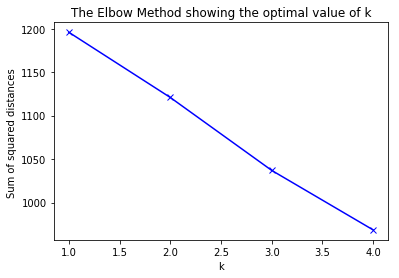

The minimum sum of sqaures of distances is : 968.472234779  for k 4


In [111]:
### PCA on scaled data using 13 components
pca=PCA(n_components=13,whiten=True,random_state=0)
X_pca_scaled_13=pca.fit_transform(scaled_X)
print("The explained variance for pca applied on scaled data is",sum(pca.explained_variance_ratio_),"using 13 components")
print("Kmeans on sclaed data with PCA using 13 components:")
model=get_kmeans(X_pca_scaled_13)

### PCA on scaled data using 15 components

The explained variance for pca applied on scaled data is 0.932602177457 using 15 components
Kmeans on sclaed data with PCA using 15 components:


Cluster_Labels      0
Infected #      65.00
Uninfected #    28.00
Infected %      69.89
Uninfected %    30.11

Sum of square of distances is: 1380.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels      0     1
Infected #      64.00   1.0
Uninfected #    27.00   1.0
Infected %      70.33  50.0
Uninfected %    29.67  50.0

Sum of square of distances is: 1304.85128326

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels      0      1      2
Infected #        0.0  60.00   5.00
Uninfected #      1.0  23.00   4.00
Infected %        0.0  72.29  55.56
Uninfected %    100.0  27.71  44.44

Sum of square of distances is: 1227.65888566

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels      0      1     2      3
Infected #      15.00  49.00   1.0    0.0
Uninfected #     8.00  18.00   1.0    1.0
Infected %      65.22  73.13  50.0    0.0
Uninfected %    34.78  26.87  50.0  100.0

Sum of square of distances is: 1150.1825059

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



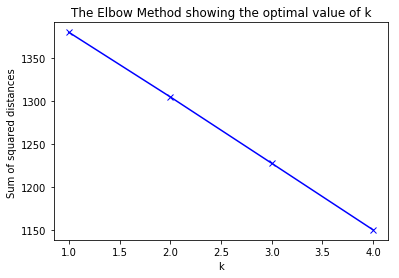

The minimum sum of sqaures of distances is : 1150.1825059  for k 4


In [112]:
### PCA on scaled data using 15 components
pca=PCA(n_components=15,whiten=True,random_state=0)
X_pca_scaled_15=pca.fit_transform(scaled_X)
print("The explained variance for pca applied on scaled data is",sum(pca.explained_variance_ratio_),"using 15 components")
print("Kmeans on sclaed data with PCA using 15 components:")
model=get_kmeans(X_pca_scaled_15)

### feature contribution when using PCA-12

In [113]:
pca=PCA(n_components=12,random_state=0,whiten=True,svd_solver='arpack')
X_pca_12=pca.fit_transform(scaled_X)
m=pd.DataFrame(pca.components_,columns=orig_X.columns,index = ['PC-1','PC-2','PC-3','PC-4','PC-5','PC-6','PC-7','PC-8','PC-9',
                                                              'PC-10','PC-11','PC-12'])
m

Number of Records  Average Size of Packets Received  \
PC-1            0.240832                          0.036842   
PC-2           -0.031500                          0.496420   
PC-3           -0.070413                         -0.038328   
PC-4           -0.002639                          0.150553   
PC-5            0.006942                          0.117808   
PC-6           -0.033495                          0.039164   
PC-7            0.037277                          0.107544   
PC-8           -0.020561                         -0.040279   
PC-9            0.005798                          0.010996   
PC-10          -0.000532                         -0.118432   
PC-11          -0.006406                          0.051257   
PC-12          -0.014999                          0.137951   

       Average Size of Packets Sent  Average Elapsed Time  \
PC-1                       0.040028              0.007070   
PC-2                       0.489762              0.009762   
PC-3                      -0.006739              0.354211   
PC-4                       0.131592             -0.285928   
PC-5                       0.103303              0.408632   
PC-6                       0.026757             -0.175378   
PC-7                       0.012212              0.280769   
PC-8                      -0.046768             -0.167382   
PC-9                      -0.023600             -0.004105   
PC-10                      0.021832             -0.035176   
PC-11                      0.072192             -0.149052   
PC-12                      0.033398              0.139267   

       Average number of Bytes sent  Average number of Bytes received  \
PC-1                       0.052863                          0.035306   
PC-2                       0.378044                          0.495130   
PC-3                      -0.021237                         -0.038494   
PC-4                      -0.033182                          0.151021   
PC-5                      -0.038018                          0.121963   
PC-6                      -0.149729                          0.047120   
PC-7                      -0.243234                          0.110270   
PC-8                      -0.046353                         -0.046863   
PC-9                       0.056180                          0.006997   
PC-10                      0.413649                         -0.126121   
PC-11                     -0.157021                          0.054640   
PC-12                     -0.400656                          0.126593   

       Number of different Source Ports  \
PC-1                           0.240483   
PC-2                          -0.025640   
PC-3                          -0.082749   
PC-4                          -0.003180   
PC-5                          -0.002580   
PC-6                          -0.034893   
PC-7                           0.033275   
PC-8                          -0.009262   
PC-9                          -0.007087   
PC-10                         -0.009545   
PC-11                          0.007618   
PC-12                         -0.008414   

       Number of different Destination Ports  \
PC-1                                0.035639   
PC-2                               -0.040462   
PC-3                                0.403232   
PC-4                               -0.177424   
PC-5                                0.485193   
PC-6                               -0.085315   
PC-7                                0.047722   
PC-8                               -0.008136   
PC-9                                0.196503   
PC-10                               0.020605   
PC-11                              -0.159047   
PC-12                              -0.177788   

       Number of different Applications  Number of different Source IP  \
PC-1                           0.202661                       0.109844   
PC-2                           0.096139                      -0.012191   
PC-3                           0.019711          

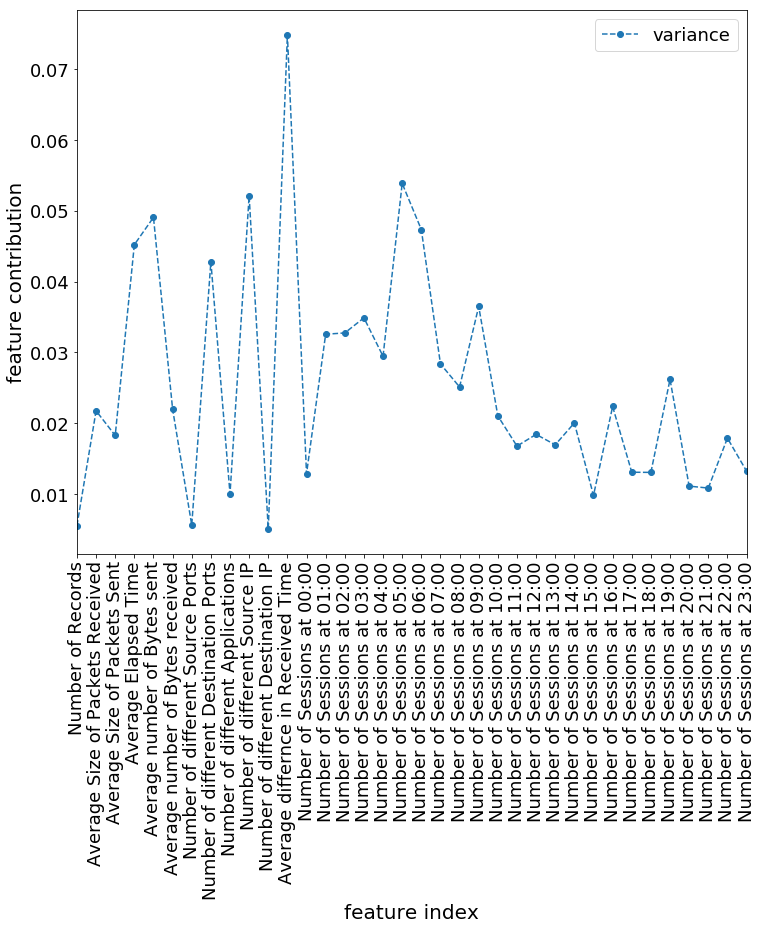

In [114]:
pca_inv_data = pca.components_

fig = plt.figure(figsize=(12, 10))
plt.plot(np.square(pca_inv_data.std(axis=0)), '--o', label = 'variance')
plt.legend(loc='lower right')
plt.ylabel('feature contribution', fontsize=20)
plt.xlabel('feature index', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),orig_X.columns,rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

### Feature Contribution using PCA-11

In [115]:
pca=PCA(n_components=11,random_state=0,whiten=True,svd_solver='arpack')
X_pca1_11=pca.fit_transform(scaled_X)
m=pd.DataFrame(pca.components_,columns=orig_X.columns,index = ['PC-1','PC-2','PC-3','PC-4','PC-5','PC-6','PC-7','PC-8','PC-9',
                                                              'PC-10','PC-11'])
m

Number of Records  Average Size of Packets Received  \
PC-1            0.240832                          0.036842   
PC-2           -0.031500                          0.496420   
PC-3           -0.070413                         -0.038328   
PC-4           -0.002639                          0.150553   
PC-5            0.006942                          0.117808   
PC-6           -0.033495                          0.039164   
PC-7            0.037277                          0.107544   
PC-8           -0.020561                         -0.040279   
PC-9            0.005798                          0.010996   
PC-10          -0.000532                         -0.118432   
PC-11          -0.006406                          0.051257   

       Average Size of Packets Sent  Average Elapsed Time  \
PC-1                       0.040028              0.007070   
PC-2                       0.489762              0.009762   
PC-3                      -0.006739              0.354211   
PC-4                       0.131592             -0.285928   
PC-5                       0.103303              0.408632   
PC-6                       0.026757             -0.175378   
PC-7                       0.012212              0.280769   
PC-8                      -0.046768             -0.167382   
PC-9                      -0.023600             -0.004105   
PC-10                      0.021832             -0.035176   
PC-11                      0.072192             -0.149052   

       Average number of Bytes sent  Average number of Bytes received  \
PC-1                       0.052863                          0.035306   
PC-2                       0.378044                          0.495130   
PC-3                      -0.021237                         -0.038494   
PC-4                      -0.033182                          0.151021   
PC-5                      -0.038018                          0.121963   
PC-6                      -0.149729                          0.047120   
PC-7                      -0.243234                          0.110270   
PC-8                      -0.046353                         -0.046863   
PC-9                       0.056180                          0.006997   
PC-10                      0.413649                         -0.126121   
PC-11                     -0.157021                          0.054640   

       Number of different Source Ports  \
PC-1                           0.240483   
PC-2                          -0.025640   
PC-3                          -0.082749   
PC-4                          -0.003180   
PC-5                          -0.002580   
PC-6                          -0.034893   
PC-7                           0.033275   
PC-8                          -0.009262   
PC-9                          -0.007087   
PC-10                         -0.009545   
PC-11                          0.007618   

       Number of different Destination Ports  \
PC-1                                0.035639   
PC-2                               -0.040462   
PC-3                                0.403232   
PC-4                               -0.177424   
PC-5                                0.485193   
PC-6                               -0.085315   
PC-7                                0.047722   
PC-8                               -0.008136   
PC-9                                0.196503   
PC-10                               0.020605   
PC-11                              -0.159047   

       Number of different Applications  Number of different Source IP  \
PC-1                           0.202661                       0.109844   
PC-2                           0.096139                      -0.012191   
PC-3                           0.019711                       0.175300   
PC-4                          -0.109135                      -0.111659   
PC-5                           0.055050                       0.207429   
PC-6                           0.170360                      -0.070730   
PC-7                          -0.160183 

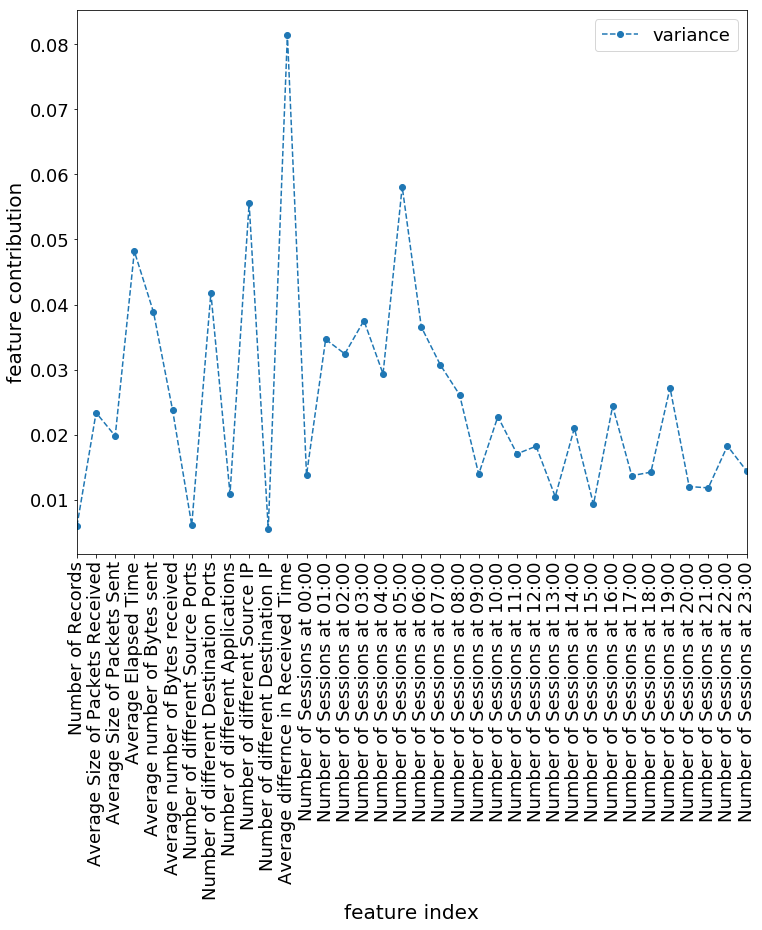

In [116]:
pca_inv_data = pca.components_

fig = plt.figure(figsize=(12, 10))
plt.plot(np.square(pca_inv_data.std(axis=0)), '--o', label = 'variance')
plt.legend(loc='lower right')
plt.ylabel('feature contribution', fontsize=20)
plt.xlabel('feature index', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),orig_X.columns,rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

### Feature Contribution using PCA-9

In [117]:
pca=PCA(n_components=9,random_state=0,whiten=True,svd_solver='arpack')
X_pca_9=pca.fit_transform(scaled_X)
m=pd.DataFrame(pca.components_,columns=orig_X.columns,index = ['PC-1','PC-2','PC-3','PC-4','PC-5','PC-6','PC-7','PC-8','PC-9'])
m

Number of Records  Average Size of Packets Received  \
PC-1           0.240832                          0.036842   
PC-2          -0.031500                          0.496420   
PC-3          -0.070413                         -0.038328   
PC-4          -0.002639                          0.150553   
PC-5           0.006942                          0.117808   
PC-6          -0.033495                          0.039164   
PC-7           0.037277                          0.107544   
PC-8          -0.020561                         -0.040279   
PC-9           0.005798                          0.010996   

      Average Size of Packets Sent  Average Elapsed Time  \
PC-1                      0.040028              0.007070   
PC-2                      0.489762              0.009762   
PC-3                     -0.006739              0.354211   
PC-4                      0.131592             -0.285928   
PC-5                      0.103303              0.408632   
PC-6                      0.026757             -0.175378   
PC-7                      0.012212              0.280769   
PC-8                     -0.046768             -0.167382   
PC-9                     -0.023600             -0.004105   

      Average number of Bytes sent  Average number of Bytes received  \
PC-1                      0.052863                          0.035306   
PC-2                      0.378044                          0.495130   
PC-3                     -0.021237                         -0.038494   
PC-4                     -0.033182                          0.151021   
PC-5                     -0.038018                          0.121963   
PC-6                     -0.149729                          0.047120   
PC-7                     -0.243234                          0.110270   
PC-8                     -0.046353                         -0.046863   
PC-9                      0.056180                          0.006997   

      Number of different Source Ports  Number of different Destination Ports  \
PC-1                          0.240483                               0.035639   
PC-2                         -0.025640                              -0.040462   
PC-3                         -0.082749                               0.403232   
PC-4                         -0.003180                              -0.177424   
PC-5                         -0.002580                               0.485193   
PC-6                         -0.034893                              -0.085315   
PC-7                          0.033275                               0.047722   
PC-8                         -0.009262                              -0.008136   
PC-9                         -0.007087                               0.196503   

      Number of different Applications  Number of different Source IP  \
PC-1                          0.202661                       0.109844   
PC-2                          0.096139                      -0.012191   
PC-3                          0.019711                       0.175300   
PC-4                         -0.109135                      -0.111659   
PC-5                          0.055050                       0.207429   
PC-6                          0.170360                      -0.070730   
PC-7                         -0.160183                      -0.350621   
PC-8                          0.110635                       0.460468   
PC-9                          0.126076                      -0.187347   

      Number of different Destination IP  Average differnce in Received Time  \
PC-1                            0.236259                           -0.091494   
PC-2                            0.001280                           -0.047961   
PC-3                            0.060988                           -0.004173   
PC-4                           -0.070352                           -0.048186   
PC-5                            0.041117                           -0.088354   
PC-6                            0.015978           

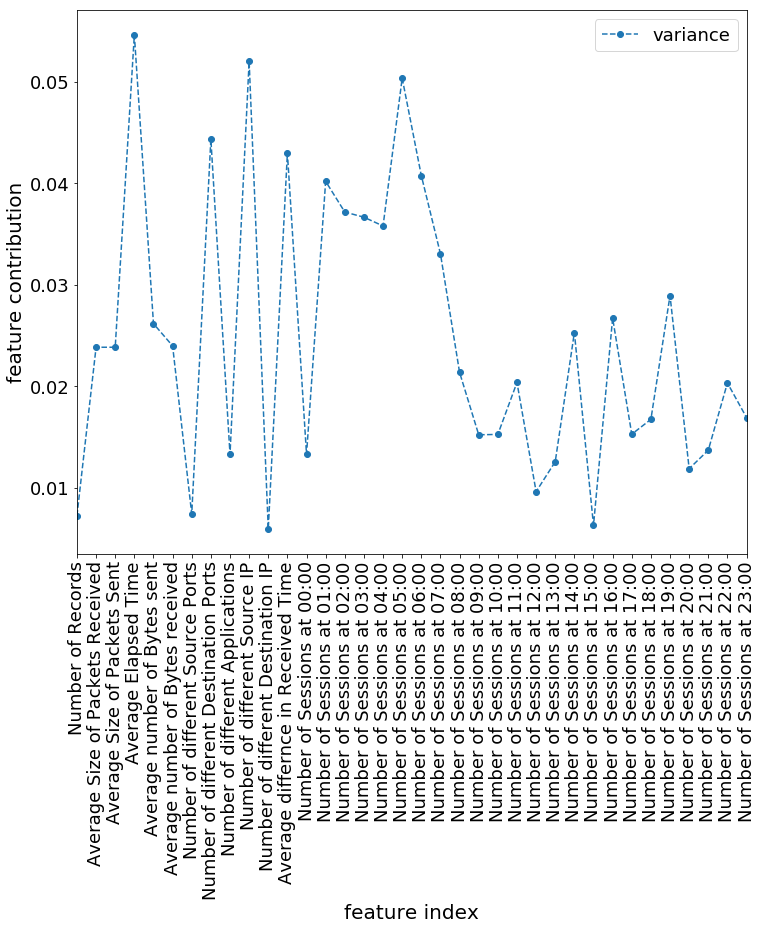

In [118]:
pca_inv_data = pca.components_

fig = plt.figure(figsize=(12, 10))
plt.plot(np.square(pca_inv_data.std(axis=0)), '--o', label = 'variance')
plt.legend(loc='lower right')
plt.ylabel('feature contribution', fontsize=20)
plt.xlabel('feature index', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),orig_X.columns,rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

### Feature Contribtuion using PCA-6

In [119]:
pca=PCA(n_components=6,random_state=0,whiten=True,svd_solver='arpack')
X_pca1_6=pca.fit_transform(scaled_X)
m=pd.DataFrame(pca.components_,columns=orig_X.columns,index = ['PC-1','PC-2','PC-3','PC-4','PC-5','PC-6'])
m

Number of Records  Average Size of Packets Received  \
PC-1           0.240832                          0.036842   
PC-2          -0.031500                          0.496420   
PC-3          -0.070413                         -0.038328   
PC-4          -0.002639                          0.150553   
PC-5           0.006942                          0.117808   
PC-6          -0.033495                          0.039164   

      Average Size of Packets Sent  Average Elapsed Time  \
PC-1                      0.040028              0.007070   
PC-2                      0.489762              0.009762   
PC-3                     -0.006739              0.354211   
PC-4                      0.131592             -0.285928   
PC-5                      0.103303              0.408632   
PC-6                      0.026757             -0.175378   

      Average number of Bytes sent  Average number of Bytes received  \
PC-1                      0.052863                          0.035306   
PC-2                      0.378044                          0.495130   
PC-3                     -0.021237                         -0.038494   
PC-4                     -0.033182                          0.151021   
PC-5                     -0.038018                          0.121963   
PC-6                     -0.149729                          0.047120   

      Number of different Source Ports  Number of different Destination Ports  \
PC-1                          0.240483                               0.035639   
PC-2                         -0.025640                              -0.040462   
PC-3                         -0.082749                               0.403232   
PC-4                         -0.003180                              -0.177424   
PC-5                         -0.002580                               0.485193   
PC-6                         -0.034893                              -0.085315   

      Number of different Applications  Number of different Source IP  \
PC-1                          0.202661                       0.109844   
PC-2                          0.096139                      -0.012191   
PC-3                          0.019711                       0.175300   
PC-4                         -0.109135                      -0.111659   
PC-5                          0.055050                       0.207429   
PC-6                          0.170360                      -0.070730   

      Number of different Destination IP  Average differnce in Received Time  \
PC-1                            0.236259                           -0.091494   
PC-2                            0.001280                           -0.047961   
PC-3                            0.060988                           -0.004173   
PC-4                           -0.070352                           -0.048186   
PC-5                            0.041117                           -0.088354   
PC-6                            0.015978                           -0.293728   

      Number of Sessions at 00:00  Number of Sessions at 01:00  \
PC-1                     0.197399                     0.155091   
PC-2                     0.005310                     0.060776   
PC-3                     0.033090                    -0.204403   
PC-4                    -0.142048                    -0.345684   
PC-5                    -0.137062                    -0.087279   
PC-6                    -0.149588                    -0.044217   

      Number of Sessions at 02:00  Number of Sessions at 03:00  \
PC-1                     0.157353                     0.144235   
PC-2                     0.031731                     0.013105   
PC-3                    -0.224352                    -0.166935   
PC-4                    -0.364818                    -0.381467   
PC-5                    -0.074631                    -0.018634   
PC-6                    -0.057307                     0.245380   

      Number of Sessions at 04:00  Number of Sessions at 05:00  \
PC-1               

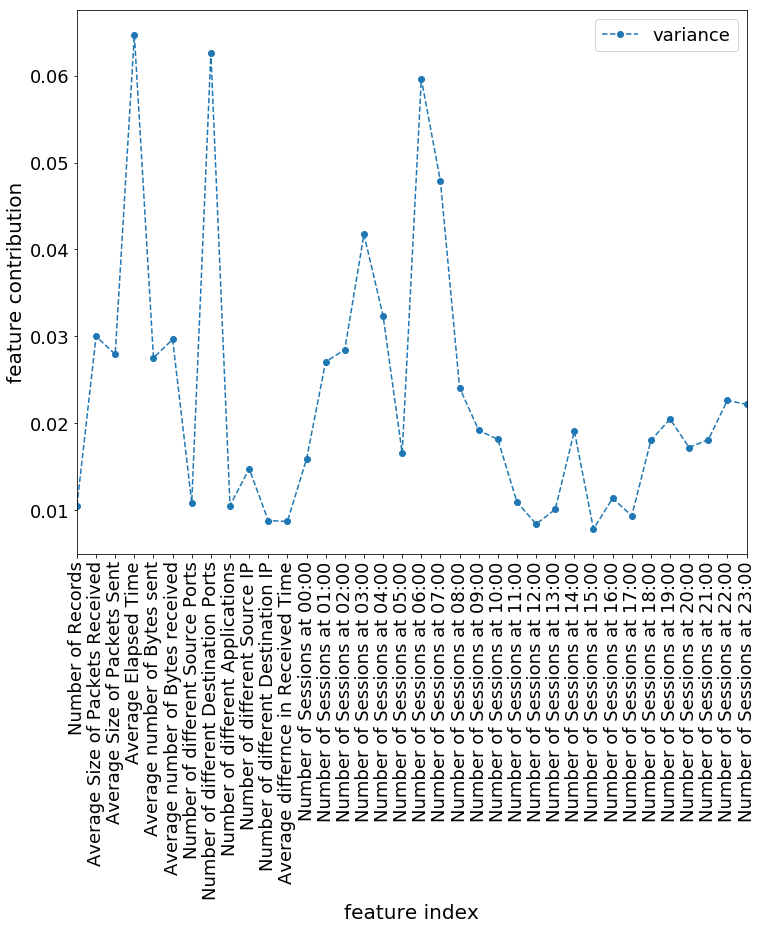

In [120]:
pca_inv_data = pca.components_

fig = plt.figure(figsize=(12, 10))
plt.plot(np.square(pca_inv_data.std(axis=0)), '--o', label = 'variance')
plt.legend(loc='lower right')
plt.ylabel('feature contribution', fontsize=20)
plt.xlabel('feature index', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),orig_X.columns,rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

### Feature Contribtuion using PCA-5

In [121]:
pca=PCA(n_components=5,random_state=0,whiten=True,svd_solver='arpack')
X_pca1_5=pca.fit_transform(scaled_X)
m=pd.DataFrame(pca.components_,columns=orig_X.columns,index = ['PC-1','PC-2','PC-3','PC-4','PC-5'])
m

Number of Records  Average Size of Packets Received  \
PC-1           0.240832                          0.036842   
PC-2          -0.031500                          0.496420   
PC-3          -0.070413                         -0.038328   
PC-4          -0.002639                          0.150553   
PC-5           0.006942                          0.117808   

      Average Size of Packets Sent  Average Elapsed Time  \
PC-1                      0.040028              0.007070   
PC-2                      0.489762              0.009762   
PC-3                     -0.006739              0.354211   
PC-4                      0.131592             -0.285928   
PC-5                      0.103303              0.408632   

      Average number of Bytes sent  Average number of Bytes received  \
PC-1                      0.052863                          0.035306   
PC-2                      0.378044                          0.495130   
PC-3                     -0.021237                         -0.038494   
PC-4                     -0.033182                          0.151021   
PC-5                     -0.038018                          0.121963   

      Number of different Source Ports  Number of different Destination Ports  \
PC-1                          0.240483                               0.035639   
PC-2                         -0.025640                              -0.040462   
PC-3                         -0.082749                               0.403232   
PC-4                         -0.003180                              -0.177424   
PC-5                         -0.002580                               0.485193   

      Number of different Applications  Number of different Source IP  \
PC-1                          0.202661                       0.109844   
PC-2                          0.096139                      -0.012191   
PC-3                          0.019711                       0.175300   
PC-4                         -0.109135                      -0.111659   
PC-5                          0.055050                       0.207429   

      Number of different Destination IP  Average differnce in Received Time  \
PC-1                            0.236259                           -0.091494   
PC-2                            0.001280                           -0.047961   
PC-3                            0.060988                           -0.004173   
PC-4                           -0.070352                           -0.048186   
PC-5                            0.041117                           -0.088354   

      Number of Sessions at 00:00  Number of Sessions at 01:00  \
PC-1                     0.197399                     0.155091   
PC-2                     0.005310                     0.060776   
PC-3                     0.033090                    -0.204403   
PC-4                    -0.142048                    -0.345684   
PC-5                    -0.137062                    -0.087279   

      Number of Sessions at 02:00  Number of Sessions at 03:00  \
PC-1                     0.157353                     0.144235   
PC-2                     0.031731                     0.013105   
PC-3                    -0.224352                    -0.166935   
PC-4                    -0.364818                    -0.381467   
PC-5                    -0.074631                    -0.018634   

      Number of Sessions at 04:00  Number of Sessions at 05:00  \
PC-1                     0.166147                     0.126519   
PC-2                     0.040611                     0.057748   
PC-3                    -0.179583                    -0.194924   
PC-4                    -0.220836                    -0.193900   
PC-5                     0.019238                     0.084052   

      Number of Sessions at 06:00  Number of Sessions at 07:00  \
PC-1                     0.096778                     0.146830   
PC-2                    -0.098877                    -0.072669   
PC-3                    -0.374195                

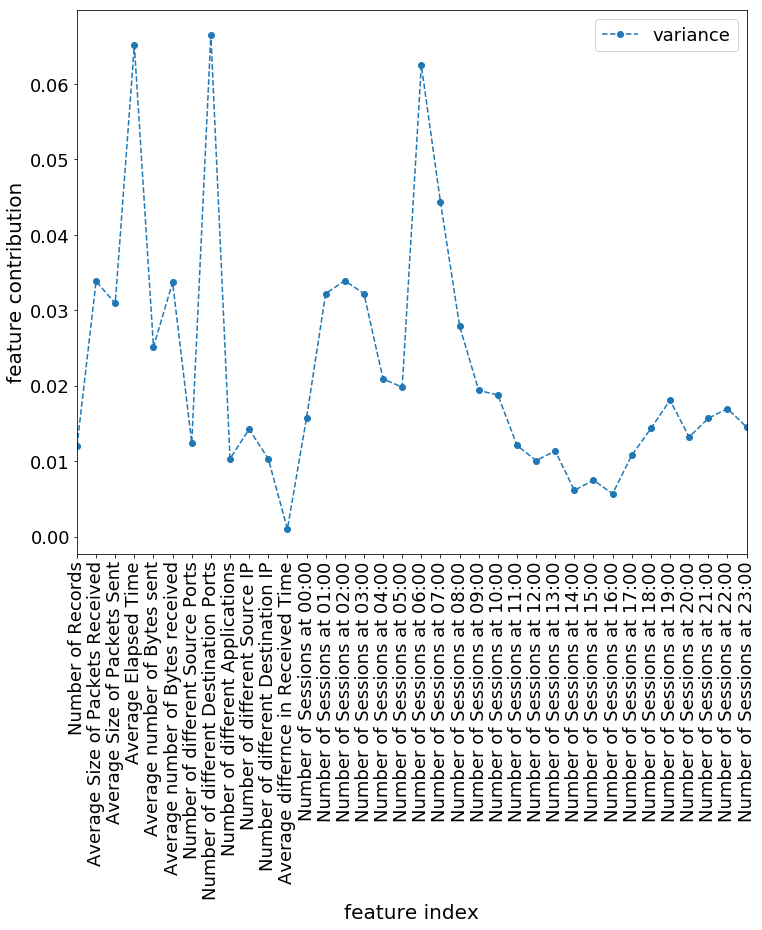

In [122]:
pca_inv_data = pca.components_

fig = plt.figure(figsize=(12, 10))
plt.plot(np.square(pca_inv_data.std(axis=0)), '--o', label = 'variance')
plt.legend(loc='lower right')
plt.ylabel('feature contribution', fontsize=20)
plt.xlabel('feature index', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),orig_X.columns,rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

### Feature Contribtuion using PCA-4

In [123]:
pca=PCA(n_components=4,random_state=0,whiten=True,svd_solver='arpack')
X_pca1_4=pca.fit_transform(scaled_X)
m=pd.DataFrame(pca.components_,columns=orig_X.columns,index = ['PC-1','PC-2','PC-3','PC-4'])
m

Number of Records  Average Size of Packets Received  \
PC-1           0.240832                          0.036842   
PC-2          -0.031500                          0.496420   
PC-3          -0.070413                         -0.038328   
PC-4          -0.002639                          0.150553   

      Average Size of Packets Sent  Average Elapsed Time  \
PC-1                      0.040028              0.007070   
PC-2                      0.489762              0.009762   
PC-3                     -0.006739              0.354211   
PC-4                      0.131592             -0.285928   

      Average number of Bytes sent  Average number of Bytes received  \
PC-1                      0.052863                          0.035306   
PC-2                      0.378044                          0.495130   
PC-3                     -0.021237                         -0.038494   
PC-4                     -0.033182                          0.151021   

      Number of different Source Ports  Number of different Destination Ports  \
PC-1                          0.240483                               0.035639   
PC-2                         -0.025640                              -0.040462   
PC-3                         -0.082749                               0.403232   
PC-4                         -0.003180                              -0.177424   

      Number of different Applications  Number of different Source IP  \
PC-1                          0.202661                       0.109844   
PC-2                          0.096139                      -0.012191   
PC-3                          0.019711                       0.175300   
PC-4                         -0.109135                      -0.111659   

      Number of different Destination IP  Average differnce in Received Time  \
PC-1                            0.236259                           -0.091494   
PC-2                            0.001280                           -0.047961   
PC-3                            0.060988                           -0.004173   
PC-4                           -0.070352                           -0.048186   

      Number of Sessions at 00:00  Number of Sessions at 01:00  \
PC-1                     0.197399                     0.155091   
PC-2                     0.005310                     0.060776   
PC-3                     0.033090                    -0.204403   
PC-4                    -0.142048                    -0.345684   

      Number of Sessions at 02:00  Number of Sessions at 03:00  \
PC-1                     0.157353                     0.144235   
PC-2                     0.031731                     0.013105   
PC-3                    -0.224352                    -0.166935   
PC-4                    -0.364818                    -0.381467   

      Number of Sessions at 04:00  Number of Sessions at 05:00  \
PC-1                     0.166147                     0.126519   
PC-2                     0.040611                     0.057748   
PC-3                    -0.179583                    -0.194924   
PC-4                    -0.220836                    -0.193900   

      Number of Sessions at 06:00  Number of Sessions at 07:00  \
PC-1                     0.096778                     0.146830   
PC-2                    -0.098877                    -0.072669   
PC-3                    -0.374195                    -0.315243   
PC-4                     0.167020                     0.090995   

      Number of Sessions at 08:00  Number of Sessions at 09:00  \
PC-1                     0.174558                     0.165178   
PC-2                    -0.155042                    -0.109915   
PC-3                    -0.149948                    -0.125362   
PC-4                     0.249107                     0.173826   

      Number of Sessions at 10:00  Number of Sessions at 11:00  \
PC-1                     0.156694                     0.185947   
PC-2                    -0.118864                    -0.032515   
PC-3        

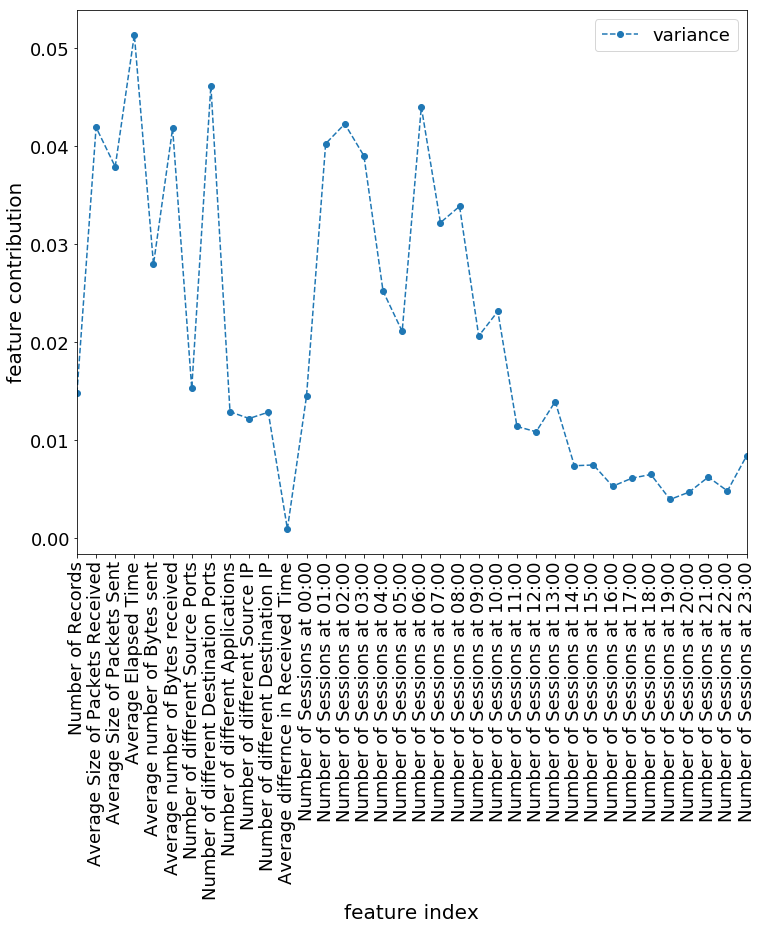

In [124]:
pca_inv_data = pca.components_

fig = plt.figure(figsize=(12, 10))
plt.plot(np.square(pca_inv_data.std(axis=0)), '--o', label = 'variance')
plt.legend(loc='lower right')
plt.ylabel('feature contribution', fontsize=20)
plt.xlabel('feature index', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),orig_X.columns,rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

### Feature Contribution using  PCA-3

In [125]:
pca=PCA(n_components=3,random_state=0,whiten=True,svd_solver='arpack')
X_pca_3=pca.fit_transform(scaled_X)
m=pd.DataFrame(pca.components_,columns=orig_X.columns,index = ['PC-1','PC-2','PC-3'])
m

Number of Records  Average Size of Packets Received  \
PC-1           0.240832                          0.036842   
PC-2          -0.031500                          0.496420   
PC-3          -0.070413                         -0.038328   

      Average Size of Packets Sent  Average Elapsed Time  \
PC-1                      0.040028              0.007070   
PC-2                      0.489762              0.009762   
PC-3                     -0.006739              0.354211   

      Average number of Bytes sent  Average number of Bytes received  \
PC-1                      0.052863                          0.035306   
PC-2                      0.378044                          0.495130   
PC-3                     -0.021237                         -0.038494   

      Number of different Source Ports  Number of different Destination Ports  \
PC-1                          0.240483                               0.035639   
PC-2                         -0.025640                              -0.040462   
PC-3                         -0.082749                               0.403232   

      Number of different Applications  Number of different Source IP  \
PC-1                          0.202661                       0.109844   
PC-2                          0.096139                      -0.012191   
PC-3                          0.019711                       0.175300   

      Number of different Destination IP  Average differnce in Received Time  \
PC-1                            0.236259                           -0.091494   
PC-2                            0.001280                           -0.047961   
PC-3                            0.060988                           -0.004173   

      Number of Sessions at 00:00  Number of Sessions at 01:00  \
PC-1                     0.197399                     0.155091   
PC-2                     0.005310                     0.060776   
PC-3                     0.033090                    -0.204403   

      Number of Sessions at 02:00  Number of Sessions at 03:00  \
PC-1                     0.157353                     0.144235   
PC-2                     0.031731                     0.013105   
PC-3                    -0.224352                    -0.166935   

      Number of Sessions at 04:00  Number of Sessions at 05:00  \
PC-1                     0.166147                     0.126519   
PC-2                     0.040611                     0.057748   
PC-3                    -0.179583                    -0.194924   

      Number of Sessions at 06:00  Number of Sessions at 07:00  \
PC-1                     0.096778                     0.146830   
PC-2                    -0.098877                    -0.072669   
PC-3                    -0.374195                    -0.315243   

      Number of Sessions at 08:00  Number of Sessions at 09:00  \
PC-1                     0.174558                     0.165178   
PC-2                    -0.155042                    -0.109915   
PC-3                    -0.149948                    -0.125362   

      Number of Sessions at 10:00  Number of Sessions at 11:00  \
PC-1                     0.156694                     0.185947   
PC-2                    -0.118864                    -0.032515   
PC-3                    -0.016963                    -0.045758   

      Number of Sessions at 12:00  Number of Sessions at 13:00  \
PC-1                     0.192685                     0.197294   
PC-2                    -0.091598                    -0.112698   
PC-3                    -0.016216                     0.125122   

      Number of Sessions at 14:00  Number of Sessions at 15:00  \
PC-1                     0.181757                     0.197033   
PC-2                    -0.057316                    -0.037769   
PC-3                     0.101300                     0.091425   

      Number of Sessions at 16:00  Number of Sessions at 17:00  \
PC-1                     0.168549                     0.203195   
PC-2                     0.018425       

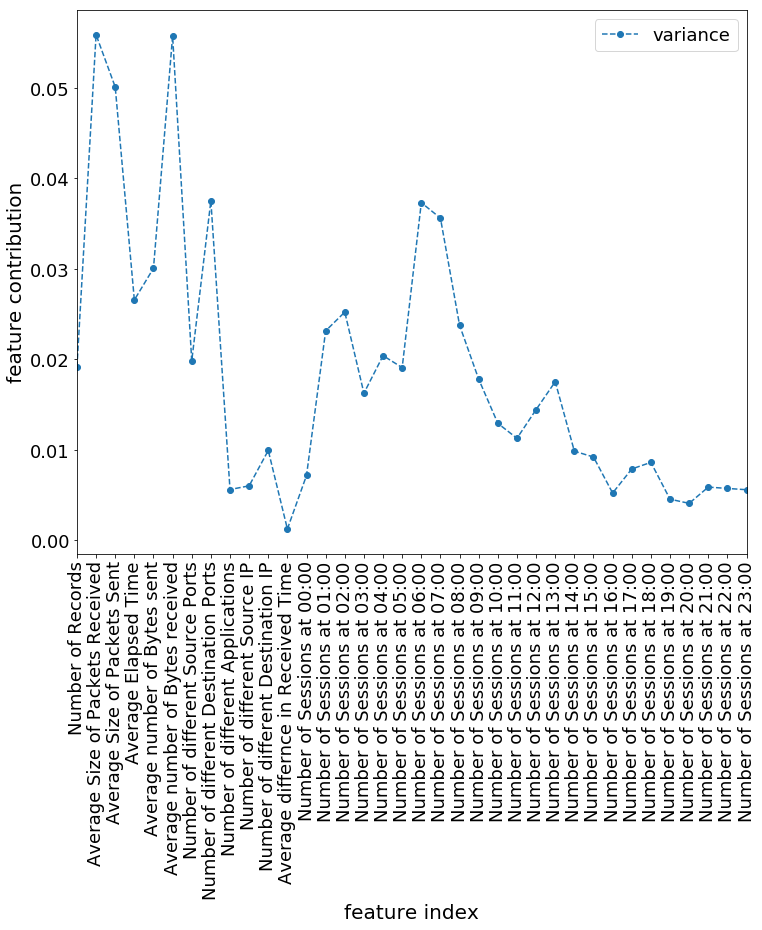

In [126]:
pca_inv_data = pca.components_

fig = plt.figure(figsize=(12, 10))
plt.plot(np.square(pca_inv_data.std(axis=0)), '--o', label = 'variance')
plt.legend(loc='lower right')
plt.ylabel('feature contribution', fontsize=20)
plt.xlabel('feature index', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),orig_X.columns,rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

In [127]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
To toggle code, click <a href="javascript:code_toggle()">here</a>.''')